# SPAN Benchmarks H3K36me3 vs RNA-seq

See https://pubmed.ncbi.nlm.nih.gov/27169896/


In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

from IPython.display import display
import pandas as pd
from tqdm.auto import tqdm
import seaborn as sns

sns.set_style("whitegrid")
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import numpy as np
import scipy as sp
import os

In [2]:
def bedl(file):
    try:
        tf = pd.read_csv(file, sep='\t', header=None)
        return tf[2] - tf[1]
    except:
        return np.zeros(0)  # Empty file


def lines(file):
    try:
        tf = pd.read_csv(file, sep='\t', header=None)
        return len(tf)
    except:
        return 0  # Empty file

def d(a, b):
    return a / b if b != 0 else 0

## Load hg38 GTF file

In [3]:
gtf_df = pd.read_csv(os.path.expanduser(
    '~/data/2022_GSE26320_GM12878_rnaseq/gencode.GRCh38.p13.v41.annotation.gtf'),
    sep='\t', comment='#',
    names=['chromosome', 'db', 'type', 'start', 'end', 'point1', 'strand', 'point2', 'aux'])
gtf_df.sample(10)

chromosome      db  type      start        end point1 strand point2  \
1953868      chr11  HAVANA   CDS  113207833  113208002      .      +      1   
547529        chr2  HAVANA   CDS  229818364  229818512      .      -      2   
2014002      chr12  HAVANA  exon   13087907   13088059      .      -      .   
1289889       chr7  HAVANA   CDS   51193379   51193589      .      -      1   
407232        chr2  HAVANA  exon   85847861   85848204      .      -      .   
511146        chr2  HAVANA   CDS  200871398  200871521      .      -      1   
1256482       chr7  HAVANA   CDS   16783417   16783488      .      +      0   
2182878      chr13  HAVANA  exon   32770654   32771079      .      +      .   
431112        chr2  HAVANA  exon  110533465  110535688      .      -      .   
3061320      chr20  HAVANA   CDS     430350     430427      .      +      0   

                                                       aux  
1953868  gene_id "ENSG00000149294.17"; transcript_id "E...  
547529   gene_id "ENSG00000153827.14"; transcript_id "E...  
2014002  gene_id "ENSG00000111305.19"; transcript_id "E...  
1289889  gene_id "ENSG00000106078.19"; transcript_id "E...  
407232   gene_id "ENSG00000115525.18"; transcript_id "E...  
511146   gene_id "ENSG00000240344.9"; transcript_id "EN...  
1256482  gene_id "ENSG00000106537.8"; transcript_id "EN...  
2182878  gene_id "ENSG00000083642.19"; transcript_id "E...  
431112   gene_id "ENSG00000183054.13"; transcript_id "E...  
3061320  gene_id "ENSG00000125826.22"; transcript_id "E...

In [4]:
print('Parse GTF aux data')
auxes = {}
for i, aux in enumerate(tqdm(gtf_df['aux'])):
    for pair in aux.split(';'):
        kv = pair.strip().split(' ')
        if len(kv) != 2:
            continue
        k, v = kv
        if k not in auxes:
            auxes[k] = vs = []
        else:
            vs = auxes[k]
        vs.append(v.strip('"'))

for k, vs in auxes.items():
    if len(vs) == len(gtf_df):
        gtf_df[k] = vs
    else:
        print(f'Ignoring {k}')
del auxes
gtf_df.drop('aux', axis=1, inplace=True)

Parse GTF aux data


  0%|          | 0/3375759 [00:00<?, ?it/s]

Ignoring hgnc_id
Ignoring havana_gene
Ignoring transcript_id
Ignoring transcript_type
Ignoring transcript_name
Ignoring transcript_support_level
Ignoring tag
Ignoring havana_transcript
Ignoring exon_number
Ignoring exon_id
Ignoring ont
Ignoring protein_id
Ignoring ccdsid
Ignoring artif_dupl


In [5]:
gtf_df[gtf_df['type'] == 'gene'].sample(5)

chromosome      db  type      start        end point1 strand point2  \
230309        chr1  HAVANA  gene  165941235  165941769      .      -      .   
2378090      chr15  HAVANA  gene   42006132   42010117      .      +      .   
3131553      chr20  HAVANA  gene   59033145   59042809      .      -      .   
2955190      chr19  HAVANA  gene   19211958   19252233      .      +      .   
1580049       chr9  HAVANA  gene   92412380   92424471      .      -      .   

                    gene_id             gene_type        gene_name level  
230309    ENSG00000271527.1  processed_pseudogene  ENSG00000271527     1  
2378090   ENSG00000257797.1                lncRNA  ENSG00000257797     2  
3131553  ENSG00000101166.16        protein_coding         PRELID3B     2  
2955190  ENSG00000130287.14        protein_coding             NCAN     1  
1580049   ENSG00000127083.8        protein_coding              OMD     2

# Hg19 H3K36me3 vs Affymetrix expression

Data were processed using GenePattern and the Robust Multichip Average (RMA) method;
quantile normalization; background correction; normalization by median scaling.


0it [00:00, ?it/s]

GSM646142_GM12878_rep1.txt.ann Total 28804 threshold for 20000 genes 8.626995258
GSM646143_GM12878_rep2.txt.ann Total 28804 threshold for 20000 genes 8.751267648
GSM646144_HepG2_rep1.txt.ann Total 28804 threshold for 20000 genes 8.706112063
GSM646145_HepG2_rep2.txt.ann Total 28804 threshold for 20000 genes 8.529440174
GSM646146_HMEC_rep1.txt.ann Total 28804 threshold for 20000 genes 8.69778293
GSM646147_HMEC_rep2.txt.ann Total 28804 threshold for 20000 genes 8.589289042
GSM646148_HSMM_rep1.txt.ann Total 28804 threshold for 20000 genes 8.637191468
GSM646149_HSMM_rep2.txt.ann Total 28804 threshold for 20000 genes 8.158643411
GSM646150_HUVEC_rep1.txt.ann Total 28804 threshold for 20000 genes 8.404830996
GSM646151_HUVEC_rep2.txt.ann Total 28804 threshold for 20000 genes 8.362543987
GSM646152_K562_rep0.txt.ann Total 28804 threshold for 20000 genes 8.446909597
GSM646153_K562_rep1.txt.ann Total 28804 threshold for 20000 genes 8.347045678
GSM646154_K562_rep2.txt.ann Total 28804 threshold for 2

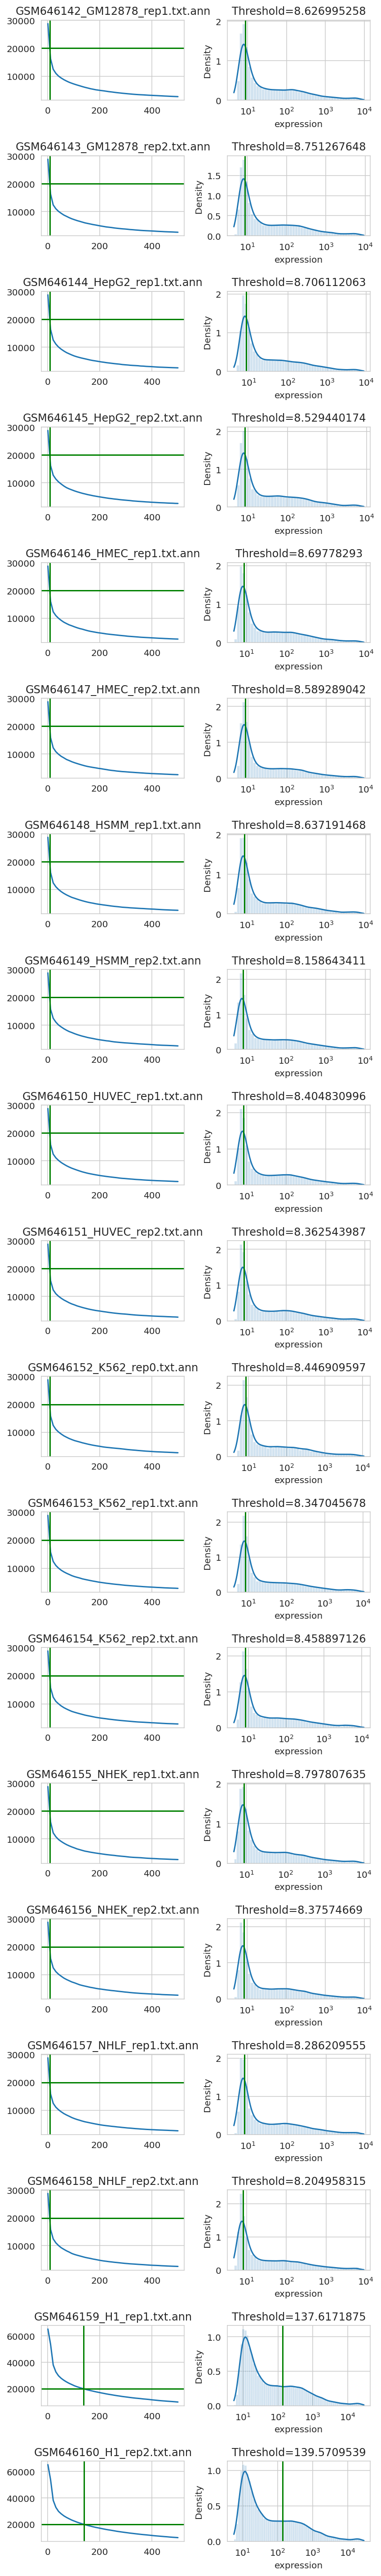

In [6]:
PATH = os.path.expanduser('~/data/GSE26312_RAW')

expr_files = [f for f in sorted(os.listdir(PATH)) if f.endswith('.ann')]

fig, axs_m = plt.subplots(len(expr_files), 2, figsize=(6, 40))
axs = []
for ax_row in axs_m:
    axs.extend(ax_row)

TOP_GENES = 20000

thresholds = {}

for i, file in tqdm(enumerate(expr_files)):
    ax = axs[i * 2]
    df = pd.read_csv(PATH + '/' + file, sep='\t')
    df['ensembl_gene_id'] = df['ensembl_gene_id'].astype(str)
    # dfp = df[df['gene_biotype'] == 'protein_coding']
    xs = np.linspace(1, 500)
    expressed = [sum(df['expression'] > x) for x in xs]
    ax.plot(xs, expressed)
    ax.axhline(y=TOP_GENES, color='green')
    threshold = list(df['expression'].copy().sort_values(ascending=False))[TOP_GENES]
    ax.axvline(x=threshold, color='green')
    ax.title.set_text(file)

    ax = axs[i * 2 + 1]
    g_results = sns.histplot(data=df,
                             x='expression', ax=ax, stat='density',
                             log_scale=True, kde=True, alpha=0.2)
    g_results.set(xscale='log')
    ax.title.set_text(f'Threshold={threshold}')
    ax.axvline(x=threshold, color='green')
    print(file, f'Total {len(df)}', f'threshold for {TOP_GENES} genes', threshold)
    thresholds[file] = threshold

plt.tight_layout()
plt.show()

In [7]:
df = pd.read_csv(PATH + '/GSM646150_HUVEC_rep1.txt.ann', sep='\t')
df['ensembl_gene_id'] = df['ensembl_gene_id'].astype(str)

Example of protein-coding genes expression


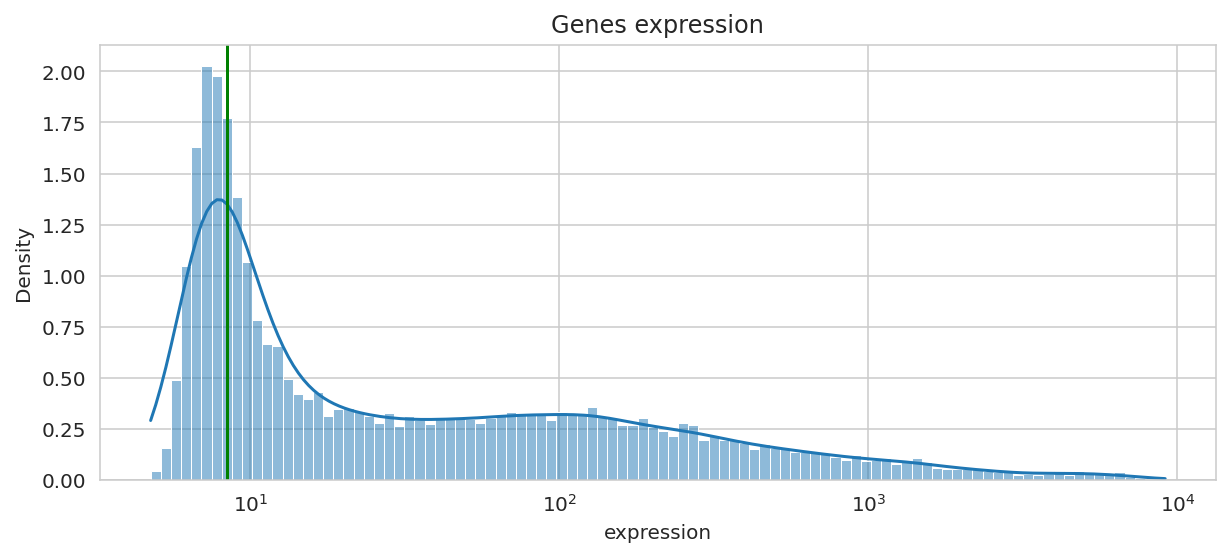

In [8]:
print('Example of protein-coding genes expression')
plt.figure(figsize=(10, 4))
ax = plt.axes()
g_results = sns.histplot(data=df[df['gene_biotype'] == 'protein_coding'], x='expression', ax=ax, stat='density',
                         bins=100, log_scale=True, kde=True)
g_results.set(xscale='log')
ax.axvline(x=thresholds['GSM646150_HUVEC_rep1.txt.ann'], color='green')
ax.title.set_text('Genes expression')

Example of all genes expression


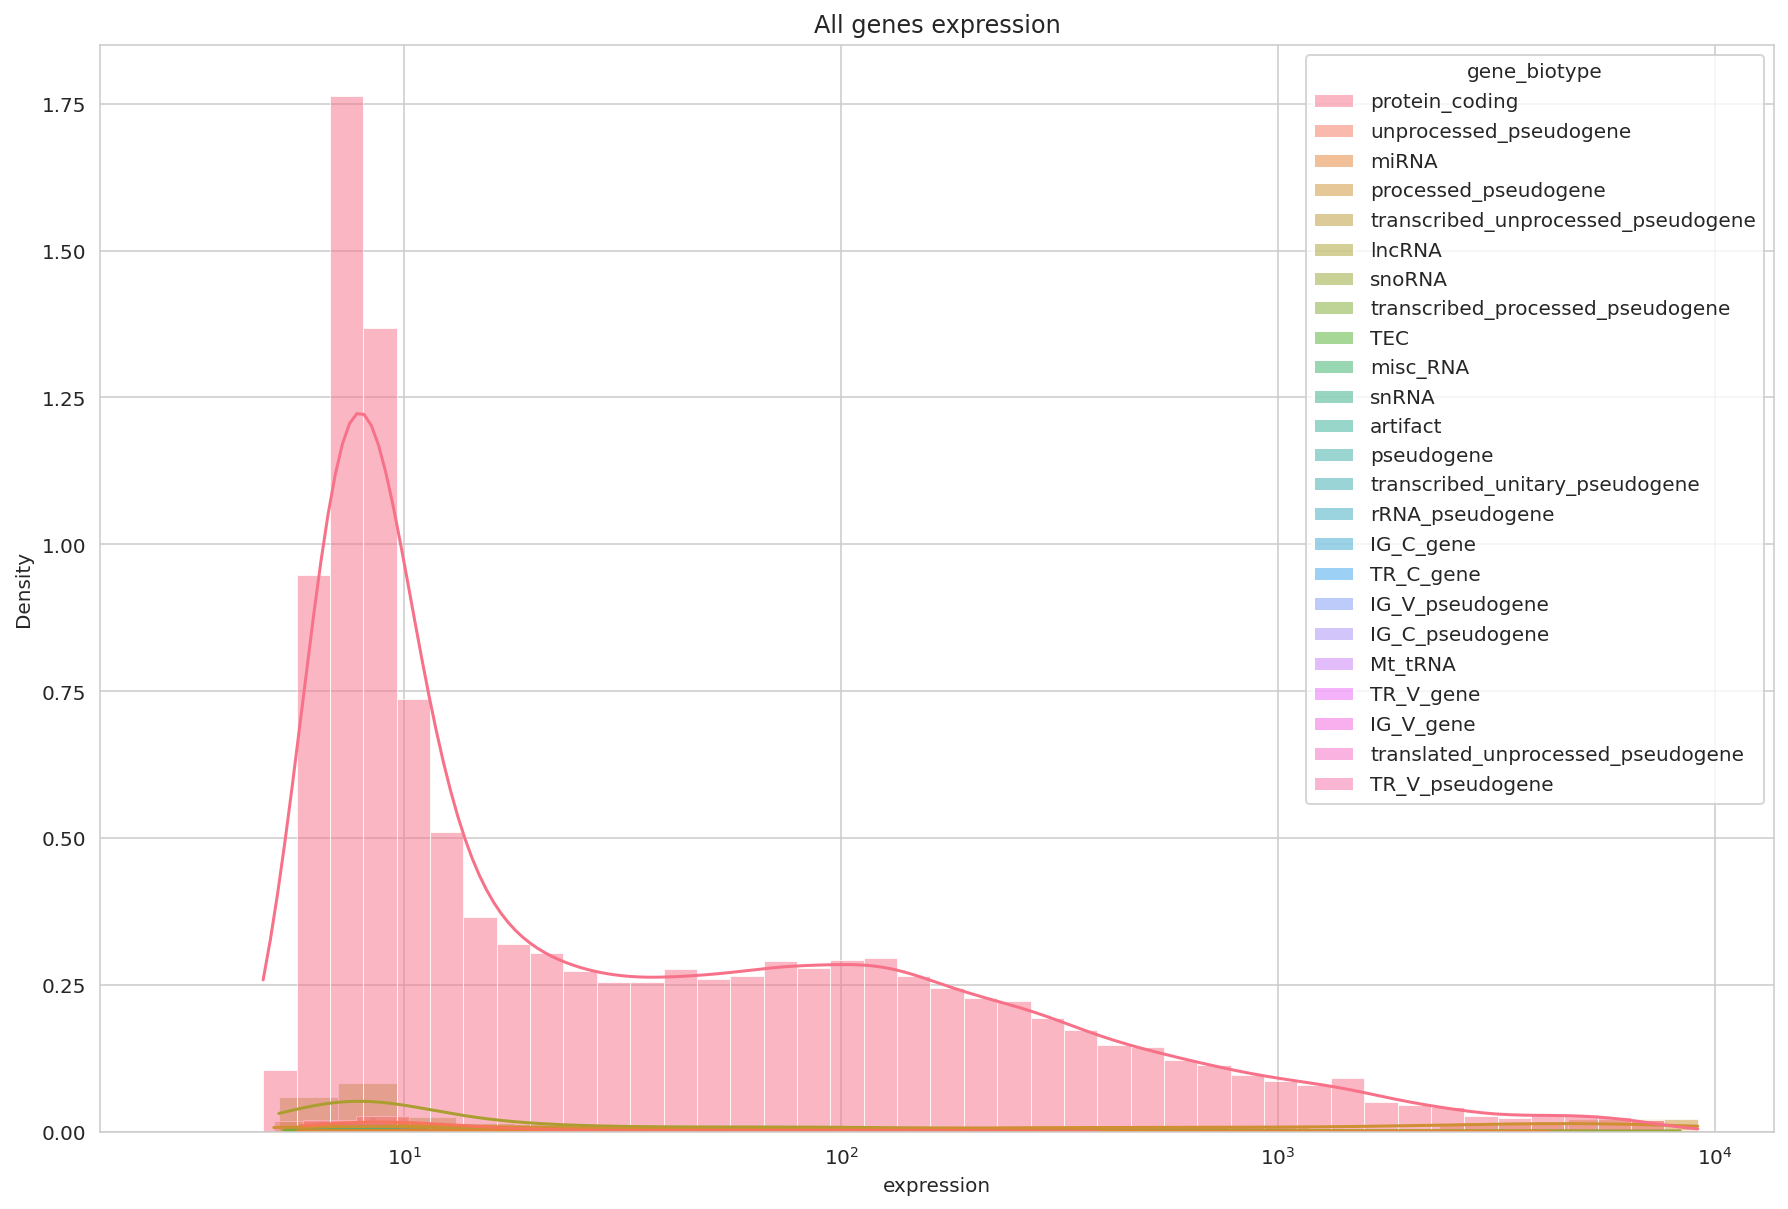

In [9]:
print('Example of all genes expression')
plt.figure(figsize=(15, 10))
ax = plt.axes()
g_results = sns.histplot(data=df, x='expression', hue='gene_biotype', common_bins=False,
                         ax=ax, stat='density',
                         log_scale=True, kde=True)
g_results.set(xscale='log')
ax.title.set_text('All genes expression')


## Loading hg19 GTF file

In [10]:
import re

print('Loading GTF genes markup')
GSE26320_PATH = os.path.expanduser('~/data/GSE26320_RAW')

GTF = 'gencode.v19.annotation.gtf.gz'
gtf_df = pd.read_csv(os.path.join(GSE26320_PATH, GTF), sep='\t', comment='#',
                     names=['chromosome', 'db', 'type', 'start', 'end', 'point1', 'strand', 'point2', 'aux'])
print('Loaded', len(gtf_df))

print('Parse GTF aux data')
auxes = {}
for i, aux in enumerate(tqdm(gtf_df['aux'])):
    for pair in aux.split(';'):
        kv = pair.strip().split(' ')
        if len(kv) != 2:
            continue
        k, v = kv
        if k not in auxes:
            auxes[k] = vs = []
        else:
            vs = auxes[k]
        vs.append(v.strip('"'))

for k, vs in auxes.items():
    if len(vs) == len(gtf_df):
        gtf_df[k] = vs
    else:
        print(f'Ignoring {k}')
del auxes
gtf_df.drop('aux', axis=1, inplace=True)

gtf_genes_df = gtf_df[gtf_df['type'] == 'gene'].copy()
print('GTF genes', len(gtf_genes_df))

# Fix . in gene_id
gtf_genes_df['gene_id'] = [re.sub('\..*', '', id) for id in gtf_genes_df['gene_id']]

Loading GTF genes markup
Loaded 2619444
Parse GTF aux data


  0%|          | 0/2619444 [00:00<?, ?it/s]

Ignoring havana_gene
Ignoring tag
Ignoring havana_transcript
Ignoring exon_number
Ignoring exon_id
Ignoring ont
Ignoring protein_id
Ignoring ccdsid
GTF genes 57820


In [11]:
print(f'Total hg19 records {len(gtf_df)}')
print(f'Total hg19 genes {sum(gtf_df["type"] == "gene")}')
print(f'Total hg19 protein_coding genes {sum((gtf_df["type"] == "gene") & (gtf_df["gene_type"] == "protein_coding"))}')

Total hg19 records 2619444
Total hg19 genes 57820
Total hg19 protein_coding genes 20345


## Annotating affymetrix data with genes positions

In [12]:
len(gtf_genes_df[gtf_genes_df['gene_type'] == 'protein_coding'])
print('Matching genes ids with positions on chromosome')

for file, threshold in tqdm(thresholds.items()):
    df = pd.read_csv(PATH + '/' + file, sep='\t')
    df['ensembl_gene_id'] = df['ensembl_gene_id'].astype(str)
    dfp = df[df['gene_biotype'] == 'protein_coding']
    result = pd.merge(dfp[dfp['expression'] > threshold], gtf_genes_df,
                      left_on='ensembl_gene_id', right_on='gene_id')[
        ['chromosome', 'start', 'end', 'gene_id', 'strand', 'expression']
    ]
    result.sort_values(by=['chromosome', 'start'], inplace=True)
    result_path = f'{PATH}/{file}_{TOP_GENES}.bed'
    print(f'Annotated {file} saved to {result_path}')
    result.to_csv(result_path, sep='\t', header=None, index=False)

Matching genes ids with positions on chromosome


  0%|          | 0/19 [00:00<?, ?it/s]

Annotated GSM646142_GM12878_rep1.txt.ann saved to /home/jetbrains/data/GSE26312_RAW/GSM646142_GM12878_rep1.txt.ann_20000.bed
Annotated GSM646143_GM12878_rep2.txt.ann saved to /home/jetbrains/data/GSE26312_RAW/GSM646143_GM12878_rep2.txt.ann_20000.bed
Annotated GSM646144_HepG2_rep1.txt.ann saved to /home/jetbrains/data/GSE26312_RAW/GSM646144_HepG2_rep1.txt.ann_20000.bed
Annotated GSM646145_HepG2_rep2.txt.ann saved to /home/jetbrains/data/GSE26312_RAW/GSM646145_HepG2_rep2.txt.ann_20000.bed
Annotated GSM646146_HMEC_rep1.txt.ann saved to /home/jetbrains/data/GSE26312_RAW/GSM646146_HMEC_rep1.txt.ann_20000.bed
Annotated GSM646147_HMEC_rep2.txt.ann saved to /home/jetbrains/data/GSE26312_RAW/GSM646147_HMEC_rep2.txt.ann_20000.bed
Annotated GSM646148_HSMM_rep1.txt.ann saved to /home/jetbrains/data/GSE26312_RAW/GSM646148_HSMM_rep1.txt.ann_20000.bed
Annotated GSM646149_HSMM_rep2.txt.ann saved to /home/jetbrains/data/GSE26312_RAW/GSM646149_HSMM_rep2.txt.ann_20000.bed
Annotated GSM646150_HUVEC_rep1.t

Expressed genes lengths


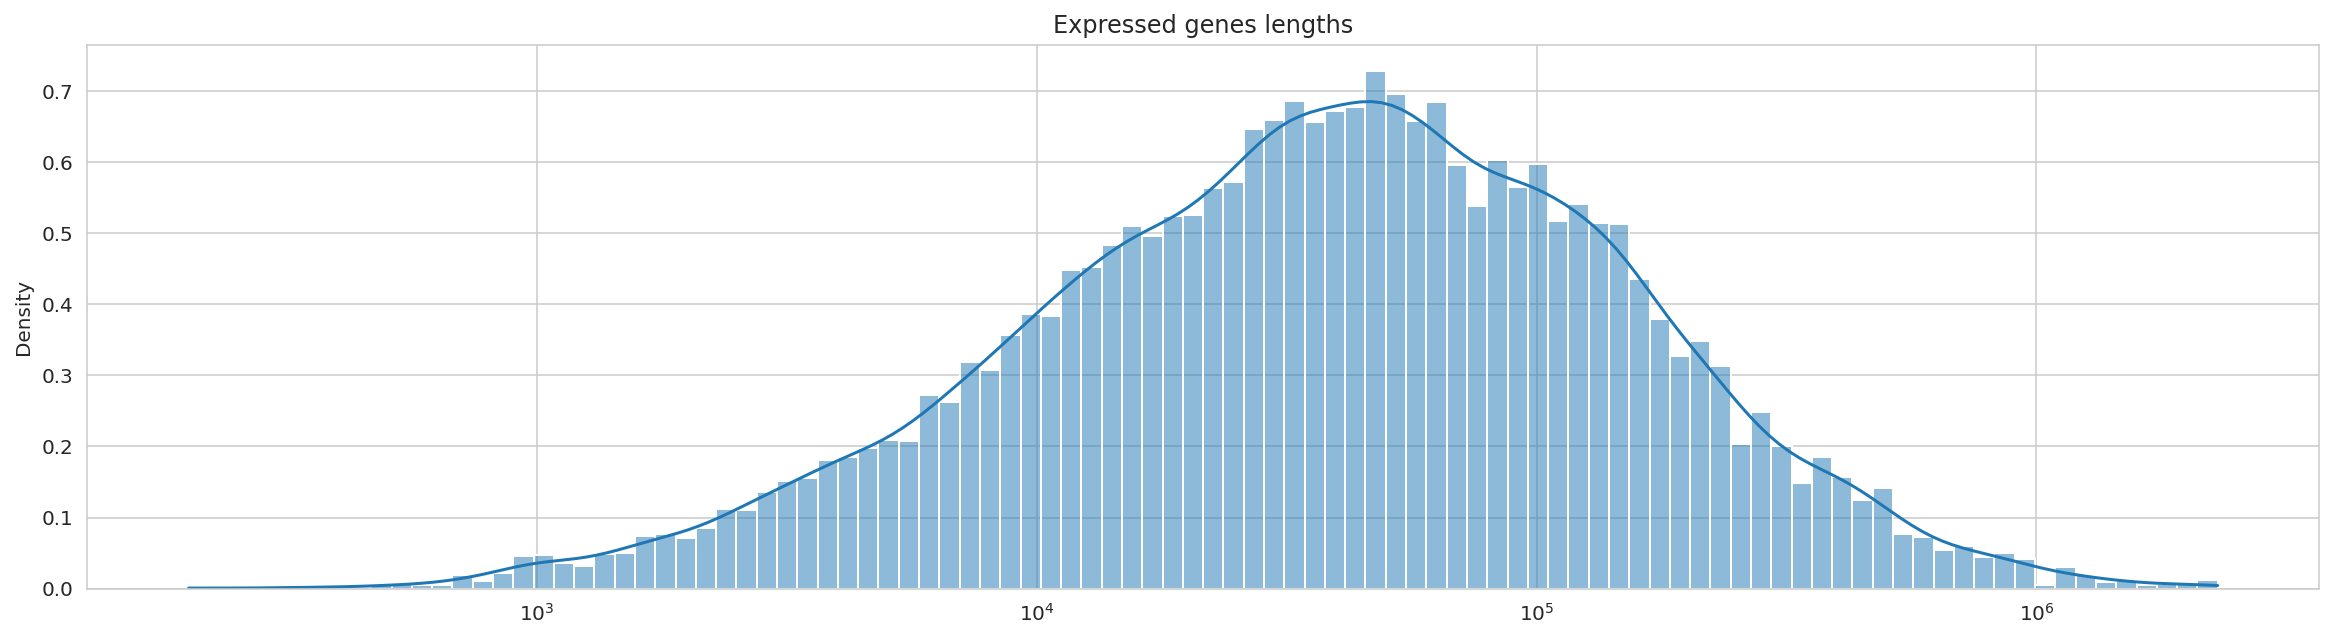

In [13]:
print(f'Expressed genes lengths')
df = pd.read_csv(PATH + '/GSM646150_HUVEC_rep1.txt.ann', sep='\t')
df['ensembl_gene_id'] = df['ensembl_gene_id'].astype(str)
# dfp = df[df['gene_biotype'] == 'protein_coding']
result = pd.merge(dfp, gtf_genes_df,
                  left_on='ensembl_gene_id', right_on='gene_id')[
    ['chromosome', 'start', 'end', 'gene_id', 'strand', 'expression']
]

genes_lengths = result['end'] - result['start']
plt.figure(figsize=(20, 5))
ax = plt.axes()
g_results = sns.histplot(x=genes_lengths, ax=ax, stat='density',
                         bins=100, log_scale=True, kde=True)
g_results.set(xscale='log')
ax.title.set_text('Expressed genes lengths')
plt.show()

## Hg19 Load peaks

In [14]:
GSE26320_CELLS = ['GM12878', 'HMEC', 'HSMM', 'K562', 'NHEK', 'NHLF', 'H1', 'Huvec', 'HepG2']
# GSE26320_MODIFICATIONS = ['CTCF', 'H3K27ac', 'H3K27me3', 'H3K36me3', 'H3K4me1', 'H3K4me2', 'H3K4me3', 'H3K9ac', 'H4K20me1']
GSE26320_MODIFICATIONS = ['H3K36me3']
GSE26320_REPS = ['rep1', 'rep2']

TOOLS = ['MACS2', 'MACS2 broad', 'SICER', 'SPAN', 'Genes']
palette = plt.cm.get_cmap('tab10', len(TOOLS))
TOOLS_PALETTE = {t: palette(i) for i, t in enumerate(TOOLS)}

def load_peaks_fdr(path, suffix, fdrs):
    df_fdr = pd.DataFrame(columns=['file', 'modification', 'cell', 'replicate', 'fdr', 'peaks', 'avlength'],
                          dtype=object)
    for f in tqdm(os.listdir(path)):
        if suffix not in f:
            continue
        fdr = next((fdr for fdr in fdrs if fdr in f), None)
        cell = next((cc for cc in GSE26320_CELLS if cc in f), None)
        mod = next((m for m in GSE26320_MODIFICATIONS if m in f), None)
        rep = 'rep1' if 'rep1' in f else 'rep2'
        if fdr and cell and rep and mod:
            peaks_path = os.path.join(path, f)
            ps, ls = lines(peaks_path), bedl(peaks_path)
            avls = 0 if ps == 0 else sum(ls) / ps
            df_fdr.loc[len(df_fdr)] = (f, mod, cell, rep, fdr, ps, avls)
    return df_fdr

In [15]:
df_fdr_macs2 = load_peaks_fdr(os.path.join(GSE26320_PATH, 'macs2'), '.narrowPeak', ['0.05'])
df_fdr_macs2['file'] = [f'{GSE26320_PATH}/macs2/{f}' for f in df_fdr_macs2['file']]
df_fdr_macs2['tool'] = 'MACS2'
print('MACS2', len(df_fdr_macs2))

df_fdr_macs2broad = load_peaks_fdr(os.path.join(GSE26320_PATH, 'macs2'), '.broadPeak', ['0.1'])
df_fdr_macs2broad['file'] = [f'{GSE26320_PATH}/macs2/{f}' for f in df_fdr_macs2broad['file']]
df_fdr_macs2broad['tool'] = 'MACS2 broad'
print('MACS2 broad', len(df_fdr_macs2broad))

df_fdr_sicer = load_peaks_fdr(os.path.join(GSE26320_PATH, 'sicer'), 'summary-FDR', ['0.01'])
df_fdr_sicer['file'] = [f'{GSE26320_PATH}/sicer/{f}' for f in df_fdr_sicer['file']]
df_fdr_sicer['tool'] = 'SICER'
print('SICER', len(df_fdr_sicer))

df_fdr_span = load_peaks_fdr(os.path.join(GSE26320_PATH, 'span'), '.peak', ['0.05'])
df_fdr_span['file'] = [f'{GSE26320_PATH}/span/{f}' for f in df_fdr_span['file']]
df_fdr_span['tool'] = 'SPAN'
print('SPAN', len(df_fdr_span))

df_fdr_peaks = pd.concat([df_fdr_macs2, df_fdr_macs2broad, df_fdr_sicer, df_fdr_span])
df_fdr_peaks.sample(5)

  0%|          | 0/1280 [00:00<?, ?it/s]

MACS2 18


  0%|          | 0/1280 [00:00<?, ?it/s]

MACS2 broad 18


  0%|          | 0/1458 [00:00<?, ?it/s]

SICER 18


  0%|          | 0/160 [00:00<?, ?it/s]

SPAN 18


file modification   cell  \
16  /home/jetbrains/data/GSE26320_RAW/sicer/GSM646...     H3K36me3  Huvec   
12  /home/jetbrains/data/GSE26320_RAW/sicer/GSM646...     H3K36me3   NHEK   
9   /home/jetbrains/data/GSE26320_RAW/macs2/GSM646...     H3K36me3   HSMM   
7   /home/jetbrains/data/GSE26320_RAW/sicer/GSM646...     H3K36me3  HepG2   
15  /home/jetbrains/data/GSE26320_RAW/sicer/GSM646...     H3K36me3   NHEK   

   replicate   fdr  peaks     avlength   tool  
16      rep1  0.01  38833  3415.346921  SICER  
12      rep2  0.01  40567  6460.163014  SICER  
9       rep1  0.05      0     0.000000  MACS2  
7       rep1  0.01  32950  8117.209408  SICER  
15      rep1  0.01  44166  3902.337409  SICER

## Expressed genes vs peaks lengths

In [16]:
ts = []
ts.append(pd.DataFrame(dict(name=['Genes'] * len(genes_lengths), length=genes_lengths)))
for file, tool in tqdm(zip(df_fdr_peaks['file'], df_fdr_peaks['tool'])):
    lengths = bedl(file)
    t = pd.DataFrame(dict(name=[tool] * len(lengths), length=lengths))
    ts.append(t.sample(min(len(t), 10_000)))
t = pd.concat(ts).reset_index(drop=True)
del ts
t.sample(10)

0it [00:00, ?it/s]

name   length
593789         SPAN  37275.0
258708  MACS2 broad   1354.0
426647        SICER   2599.0
458013        SICER   8999.0
549017         SPAN    700.0
185797  MACS2 broad    383.0
660915         SPAN   1542.0
244791  MACS2 broad    460.0
149936        MACS2    228.0
420351        SICER   4999.0

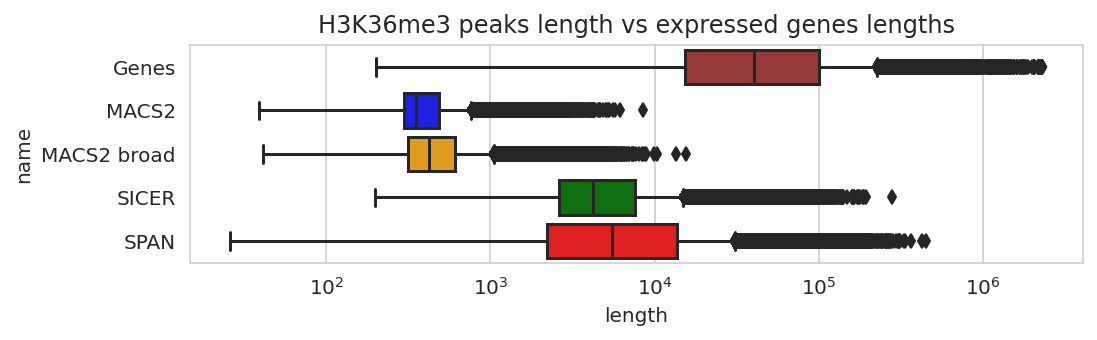

In [17]:
plt.figure(figsize=(8, 2))
ax = plt.axes()
g_results = sns.boxplot(data=t, x='length', y='name', ax=ax, palette=TOOLS_PALETTE)
g_results.set(xscale='log')
ax.title.set_text('H3K36me3 peaks length vs expressed genes lengths')
plt.show()

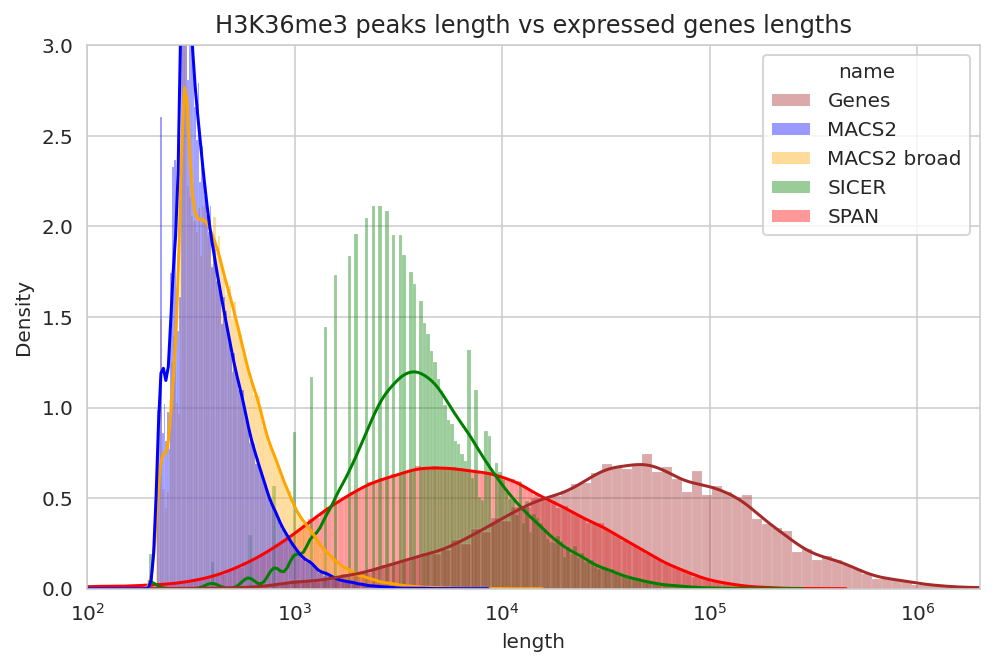

In [18]:
plt.figure(figsize=(8, 5))
ax = plt.axes()
g_results = sns.histplot(data=t, x='length', hue='name', ax=ax,
                         stat='density', common_bins=False, common_norm=False,
                         kde=True, log_scale=True, alpha=0.4,
                         palette=TOOLS_PALETTE)
g_results.set(xscale='log')
g_results.set_ylim(0, 3)
g_results.set_xlim(1e2, 2e6)
ax.title.set_text('H3K36me3 peaks length vs expressed genes lengths')
plt.show()

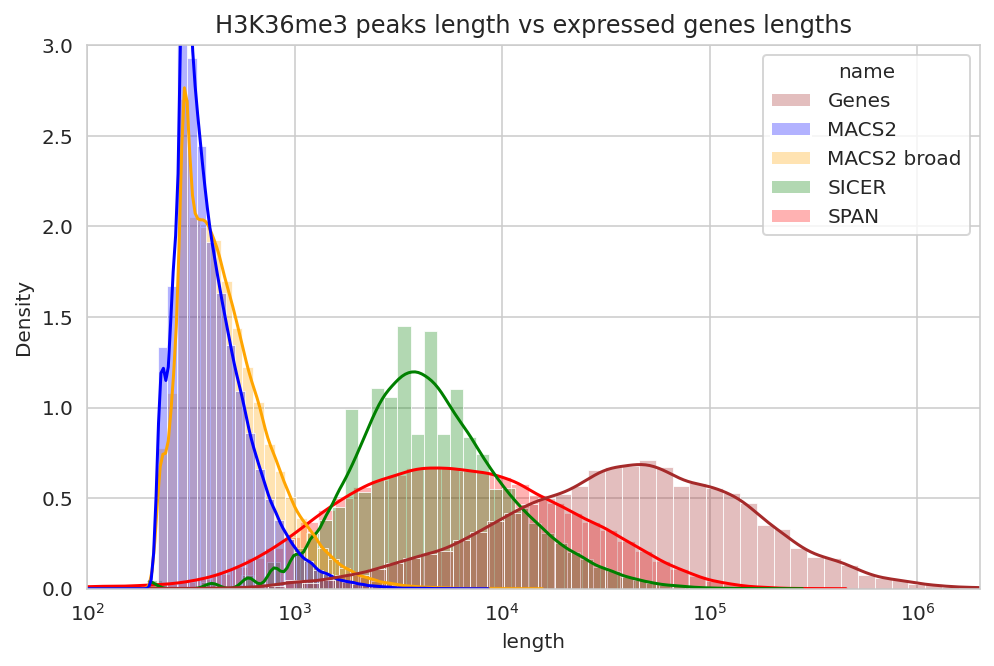

In [19]:
plt.figure(figsize=(8, 5))
ax = plt.axes()
g_results = sns.histplot(data=t, x='length', hue='name', ax=ax,
                         stat='density', common_bins=False, common_norm=False,
                         bins=50, kde=True, log_scale=True, alpha=0.3,
                         palette=TOOLS_PALETTE)
g_results.set(xscale='log')
g_results.set_ylim(0, 3)
g_results.set_xlim(1e2, 2e6)
ax.title.set_text('H3K36me3 peaks length vs expressed genes lengths')
plt.show()

In [20]:
# Randomly tweak SICER lengths for visualization purposes
tsicer = t['name'] == 'SICER'
t.loc[tsicer, 'length'] += np.random.normal(0, 100, size=sum(tsicer))

/home/jetbrains/miniconda3/envs/pubtrends/lib/python3.10/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


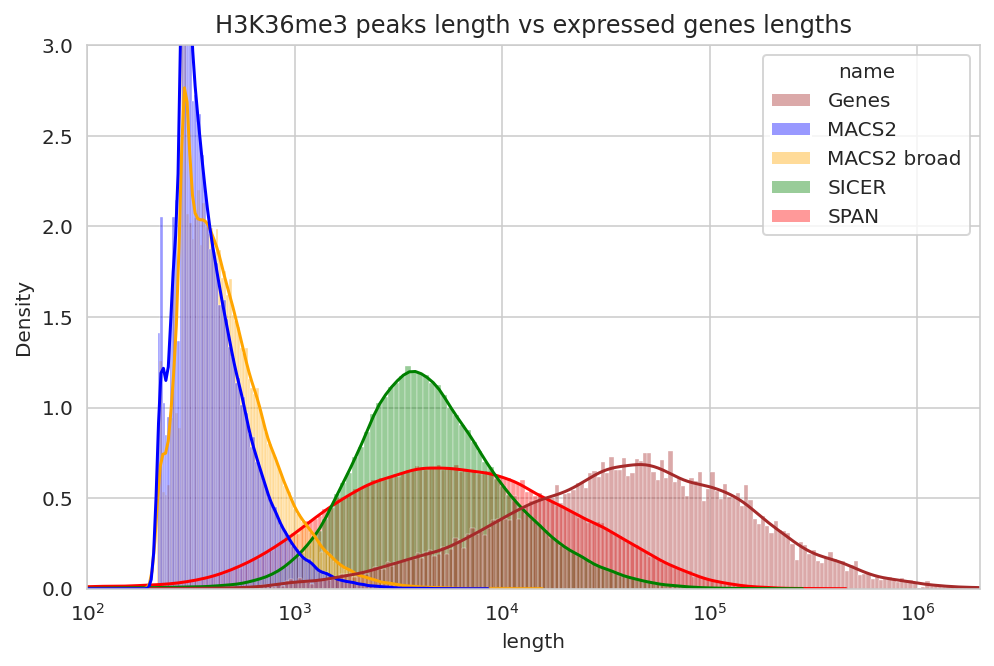

In [21]:
plt.figure(figsize=(8, 5))
ax = plt.axes()
g_results = sns.histplot(data=t, x='length', hue='name', ax=ax,
                         stat='density', common_bins=False, common_norm=False,
                         bins=200, kde=True, log_scale=True, alpha=0.4,
                         palette=TOOLS_PALETTE)
g_results.set(xscale='log')
g_results.set_ylim(0, 3)
g_results.set_xlim(1e2, 2e6)
ax.title.set_text('H3K36me3 peaks length vs expressed genes lengths')
plt.show()

## Overlap H3K36me3 vs genes

In [22]:
import tempfile
from itertools import product

tf = tempfile.mktemp()

bench_df = pd.DataFrame(
    columns=['cell', 'replicate', 'name', 'overlap', 'peaks', 'genes', 'peaks_overlap', 'genes_overlap'],
    dtype=object
)

for c, r in tqdm(product(GSE26320_CELLS, GSE26320_REPS)):
    if c == 'H1':  # Ignore H1, as expression is with different platform
        continue
    print(c, r)
    expr_file = [f for f in expr_files if c in f and r in f]
    if len(expr_file) == 0:
        continue
    expr_file = f'{PATH}/{expr_file[0]}_{TOP_GENES}.bed'
    genes = lines(expr_file)
    for tool in set(df_fdr_peaks['tool']):
        peaks_file = df_fdr_peaks[(df_fdr_peaks['tool'] == tool) & (df_fdr_peaks['modification'] == 'H3K36me3') &
                                  (df_fdr_peaks['cell'] == c) & (df_fdr_peaks['replicate'] == r)]['file'].values[0]
        peaks = lines(peaks_file)
        for overlap, overlap_param in [
            ('1bp overlap', ''),
            ('50% overlap', ' -f 0.5 '),
            ('80% overlap', ' -f 0.8 '),
        ]:
            !bedtools intersect -a {peaks_file} -b {expr_file} -wa -u {overlap_param} > {tf}
            peaks_overlap = lines(tf)
            !bedtools intersect -b {peaks_file} -a {expr_file} -wa -u {overlap_param} > {tf}
            genes_overlap = lines(tf)
            bench_df.loc[len(bench_df)] = (c, r, tool, overlap, peaks, genes, peaks_overlap, genes_overlap)
bench_df

0it [00:00, ?it/s]

GM12878 rep1
GM12878 rep2
HMEC rep1
HMEC rep2
HSMM rep1
HSMM rep2
K562 rep1
K562 rep2
NHEK rep1
NHEK rep2
NHLF rep1
NHLF rep2
Huvec rep1
Huvec rep2
HepG2 rep1
HepG2 rep2


cell replicate         name      overlap  peaks  genes  peaks_overlap  \
0    GM12878      rep1        MACS2  1bp overlap   3627  14783           1345   
1    GM12878      rep1        MACS2  50% overlap   3627  14783           1333   
2    GM12878      rep1        MACS2  80% overlap   3627  14783           1331   
3    GM12878      rep1  MACS2 broad  1bp overlap  10199  14783           3797   
4    GM12878      rep1  MACS2 broad  50% overlap  10199  14783           3766   
..       ...       ...          ...          ...    ...    ...            ...   
163    HepG2      rep2         SPAN  50% overlap  29808  14872          11011   
164    HepG2      rep2         SPAN  80% overlap  29808  14872          10164   
165    HepG2      rep2        SICER  1bp overlap  35367  14872          14666   
166    HepG2      rep2        SICER  50% overlap  35367  14872          13409   
167    HepG2      rep2        SICER  80% overlap  35367  14872          12521   

     genes_overlap  
0             1302  
1                0  
2                0  
3             2442  
4                0  
..             ...  
163           1778  
164            863  
165           6989  
166           1285  
167            580  

[168 rows x 8 columns]

In [23]:
bench_df['precision'] = [d(a, b) for a, b in zip(bench_df['peaks_overlap'], bench_df['peaks'])]
bench_df['sensitivity'] = [d(a, b) for a, b in zip(bench_df['genes_overlap'], bench_df['genes'])]
bench_df['f1'] = [d(2, d(1, s + 1e-10) + d(1, p + 1e-10))
                  for s, p in zip(bench_df['sensitivity'], bench_df['precision'])]

In [24]:
print('Ignore outliers')
print(len(bench_df[bench_df['precision'] < 0.1]))
bench_df = bench_df[bench_df['precision'] >= 0.1]

Ignore outliers
12


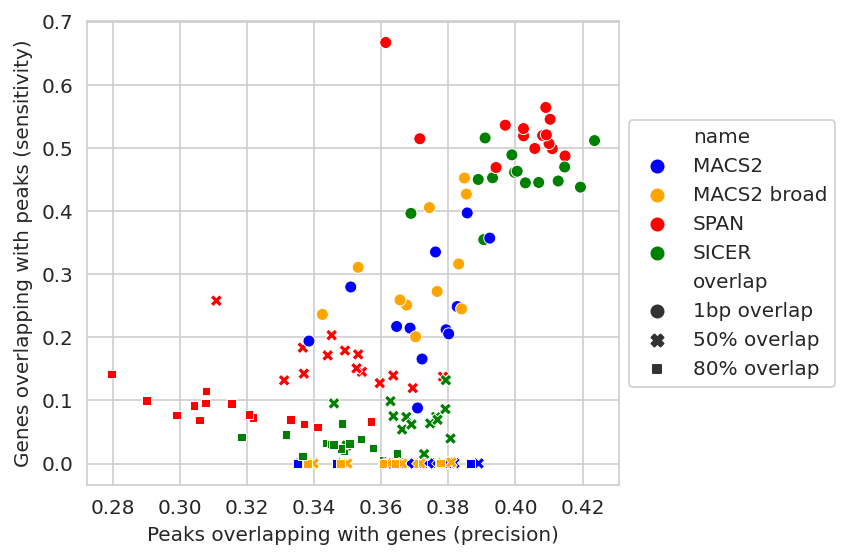

In [25]:
import seaborn as sns

plt.figure(figsize=(6, 4))
g_results = sns.scatterplot(data=bench_df, x='precision', y='sensitivity', hue='name', style='overlap',
                            palette=TOOLS_PALETTE)
# Put a legend to the right of the current axis
g_results.axes.legend(loc='center left', bbox_to_anchor=(1, 0.5))
g_results.axes.set_xlabel('Peaks overlapping with genes (precision)')
g_results.axes.set_ylabel('Genes overlapping with peaks (sensitivity)')
plt.tight_layout()
plt.show()

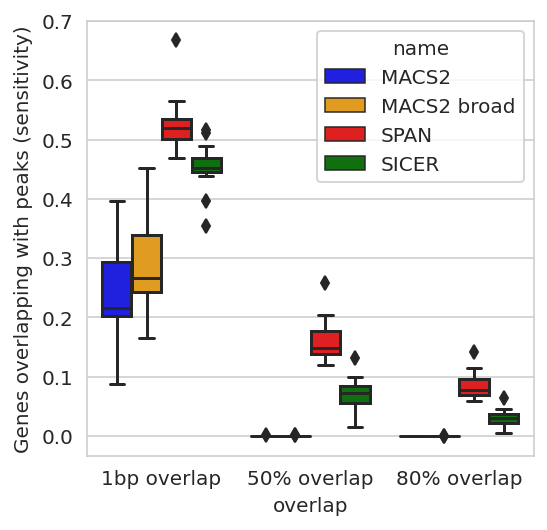

In [26]:
plt.figure(figsize=(4, 4))
g_results = sns.boxplot(data=bench_df, x='overlap', y='sensitivity', hue='name',
                        palette=TOOLS_PALETTE)
g_results.axes.set_ylabel('Genes overlapping with peaks (sensitivity)')
plt.show()

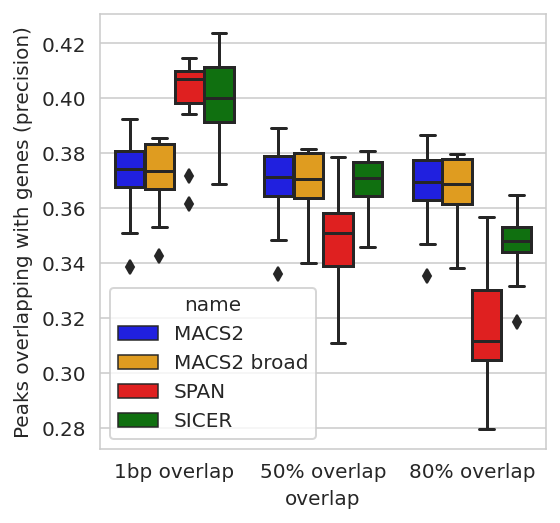

In [27]:
plt.figure(figsize=(4, 4))
g_results = sns.boxplot(data=bench_df, x='overlap', y='precision', hue='name',
                        palette=TOOLS_PALETTE)
g_results.axes.set_ylabel('Peaks overlapping with genes (precision)')
plt.show()

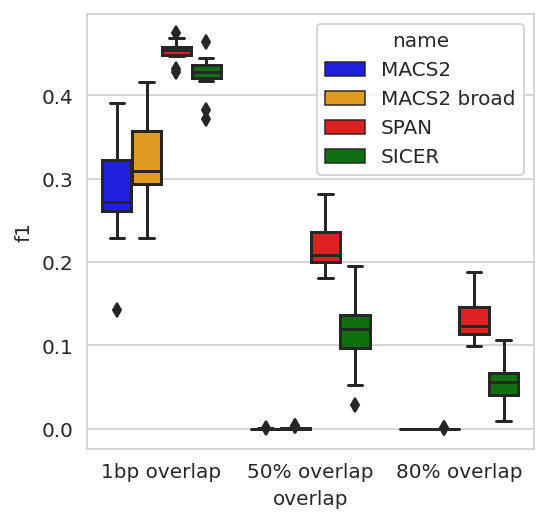

In [28]:
plt.figure(figsize=(4, 4))
sns.boxplot(data=bench_df, x='overlap', y='f1', hue='name',
            palette=TOOLS_PALETTE)
plt.show()

## Overlap H3K36me3 diff vs genes

In [29]:
TOOLS = list(sorted(set(bench_df['name'])))

diff_bench_df = pd.DataFrame(
    columns=['cell', 'replicate', 'name', 'overlap', 'peaks', 'peaks_overlap', 'genes', 'genes_overlap'],
    dtype=object
)

tf = tempfile.mktemp()
tf2 = tempfile.mktemp()

for c, r in tqdm(product(GSE26320_CELLS, GSE26320_REPS)):
    if c == 'H1':  # Ignore H1, as expression is with different platform
        continue
    print(c, r)
    expr_file = [f for f in expr_files if c in f and r in f]
    if len(expr_file) == 0:
        continue
    expr_file = f'{PATH}/{expr_file[0]}_{TOP_GENES}.bed'

    span_file = df_fdr_peaks[(df_fdr_peaks['tool'] == 'SPAN') & (df_fdr_peaks['modification'] == 'H3K36me3') &
                             (df_fdr_peaks['cell'] == c) & (df_fdr_peaks['replicate'] == r)]['file'].values[0]
    genes = lines(expr_file)
    # Processing single tools information
    for tool in TOOLS:
        if tool == 'SPAN':
            continue
        peaks_file = df_fdr_peaks[(df_fdr_peaks['tool'] == tool) & (df_fdr_peaks['modification'] == 'H3K36me3') &
                                  (df_fdr_peaks['cell'] == c) & (df_fdr_peaks['replicate'] == r)]['file'].values[0]
        for name, args in [
            (f'SPAN - {tool}', f' -a {span_file} -b {peaks_file} '),
            (f'{tool} - SPAN', f' -b {span_file} -a {peaks_file} ')]:
            for overlap, overlap_param in [
                ('1bp overlap', ''),
                ('50% overlap', '-f 0.5'),
                ('80% overlap', '-f 0.8')
            ]:
                !bedtools intersect {args} -wa -v > {tf}
                !bedtools intersect -a {tf} -b {expr_file} -wa -u {overlap_param} > {tf2}
                peaks, peaks_overlap = lines(tf), lines(tf2)
                !bedtools intersect -b {tf} -a {expr_file} -wa -u {overlap_param} > {tf2}
                genes_overlap = lines(tf2)
                diff_bench_df.loc[len(diff_bench_df)] = \
                    (c, r, name, overlap, peaks, peaks_overlap, genes, genes_overlap)

display(diff_bench_df.head())

0it [00:00, ?it/s]

GM12878 rep1
GM12878 rep2
HMEC rep1
HMEC rep2
HSMM rep1
HSMM rep2
K562 rep1
K562 rep2
NHEK rep1
NHEK rep2
NHLF rep1
NHLF rep2
Huvec rep1
Huvec rep2
HepG2 rep1
HepG2 rep2


cell replicate          name      overlap  peaks  peaks_overlap  genes  \
0  GM12878      rep1  SPAN - MACS2  1bp overlap  23129           9193  14783   
1  GM12878      rep1  SPAN - MACS2  50% overlap  23129           7993  14783   
2  GM12878      rep1  SPAN - MACS2  80% overlap  23129           7214  14783   
3  GM12878      rep1  MACS2 - SPAN  1bp overlap     32              0  14783   
4  GM12878      rep1  MACS2 - SPAN  50% overlap     32              0  14783   

   genes_overlap  
0           6391  
1           1656  
2            839  
3              0  
4              0

In [30]:
diff_bench_df['precision'] = [d(a, b) for a, b in zip(diff_bench_df['peaks_overlap'], diff_bench_df['peaks'])]
diff_bench_df['sensitivity'] = [d(a, b) for a, b in zip(diff_bench_df['genes_overlap'], diff_bench_df['genes'])]
diff_bench_df['f1'] = [d(2, d(1, s + 1e-10) + d(1, p + 1e-10))
                       for s, p in zip(diff_bench_df['sensitivity'], diff_bench_df['precision'])]

In [31]:
full_bench_df = pd.concat([
    bench_df[['cell', 'replicate', 'name', 'peaks', 'overlap', 'precision', 'sensitivity']],
    diff_bench_df[['cell', 'replicate', 'name', 'peaks', 'overlap', 'precision', 'sensitivity']]]).reset_index(drop=True)
full_bench_df

cell replicate          name  peaks      overlap  precision  \
0    GM12878      rep1         MACS2   3627  1bp overlap   0.370830   
1    GM12878      rep1         MACS2   3627  50% overlap   0.367521   
2    GM12878      rep1         MACS2   3627  80% overlap   0.366970   
3    GM12878      rep1   MACS2 broad  10199  1bp overlap   0.372291   
4    GM12878      rep1   MACS2 broad  10199  50% overlap   0.369252   
..       ...       ...           ...    ...          ...        ...   
403    HepG2      rep2  SPAN - SICER   5830  50% overlap   0.374957   
404    HepG2      rep2  SPAN - SICER   5830  80% overlap   0.370326   
405    HepG2      rep2  SICER - SPAN    357  1bp overlap   0.394958   
406    HepG2      rep2  SICER - SPAN    357  50% overlap   0.378151   
407    HepG2      rep2  SICER - SPAN    357  80% overlap   0.361345   

     sensitivity  
0       0.088074  
1       0.000000  
2       0.000000  
3       0.165190  
4       0.000000  
..           ...  
403     0.000672  
404     0.000067  
405     0.015398  
406     0.000000  
407     0.000000  

[408 rows x 7 columns]

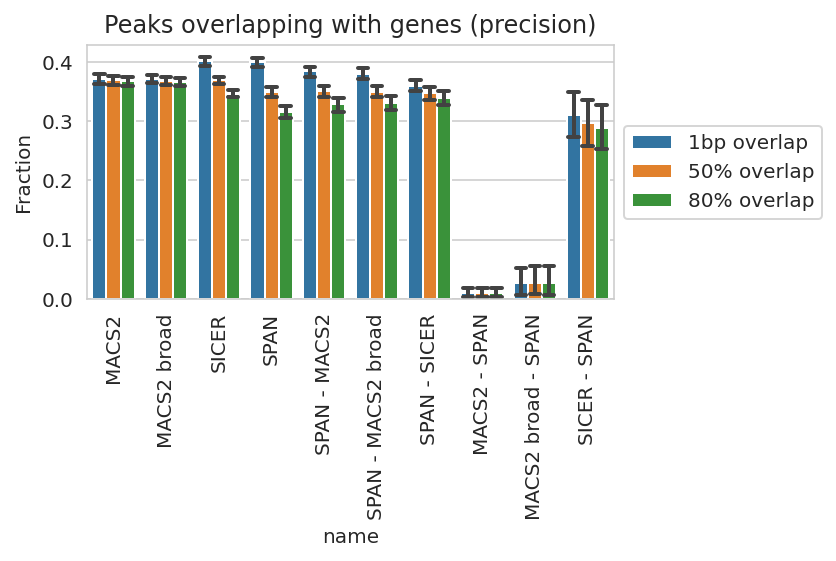

In [32]:
plt.figure(figsize=(6, 4))
ax = plt.axes()
ax.title.set_text('Peaks overlapping with genes (precision)')
g_results = sns.barplot(data=full_bench_df, x='name', y='precision',
                        hue='overlap',
                        capsize=.2, errwidth=2, ax=ax,
                        order=['MACS2', 'MACS2 broad', 'SICER', 'SPAN',
                               'SPAN - MACS2', 'SPAN - MACS2 broad', 'SPAN - SICER',
                               'MACS2 - SPAN', 'MACS2 broad - SPAN', 'SICER - SPAN',
                               ])
ax.xaxis.set_tick_params(rotation=90)
ax.set_ylabel('Fraction')
# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

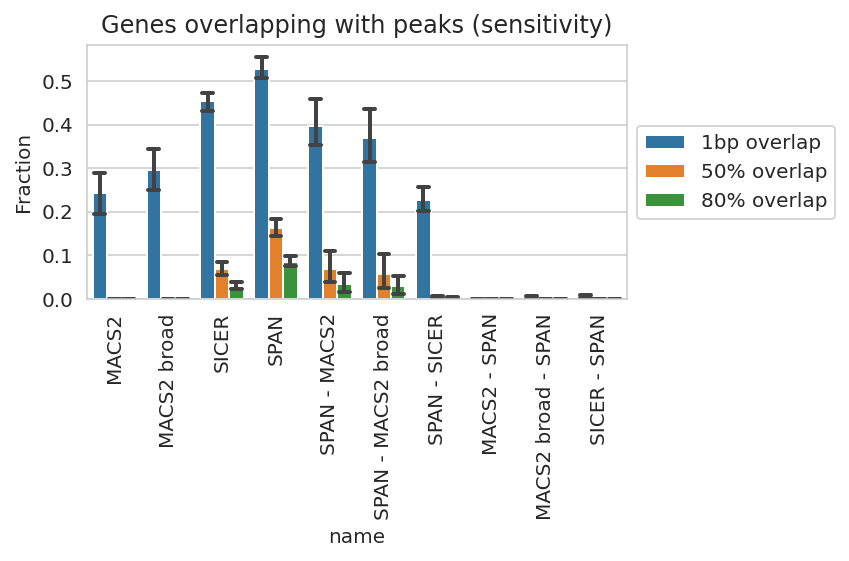

In [33]:
plt.figure(figsize=(6, 4))
ax = plt.axes()
ax.title.set_text('Genes overlapping with peaks (sensitivity)')
g_results = sns.barplot(data=full_bench_df, x='name', y='sensitivity',
                        hue='overlap',
                        capsize=.2, errwidth=2, ax=ax,
                        order=['MACS2', 'MACS2 broad', 'SICER', 'SPAN',
                               'SPAN - MACS2', 'SPAN - MACS2 broad', 'SPAN - SICER',
                               'MACS2 - SPAN', 'MACS2 broad - SPAN', 'SICER - SPAN',
                               ])
ax.xaxis.set_tick_params(rotation=90)
ax.set_ylabel('Fraction')
# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

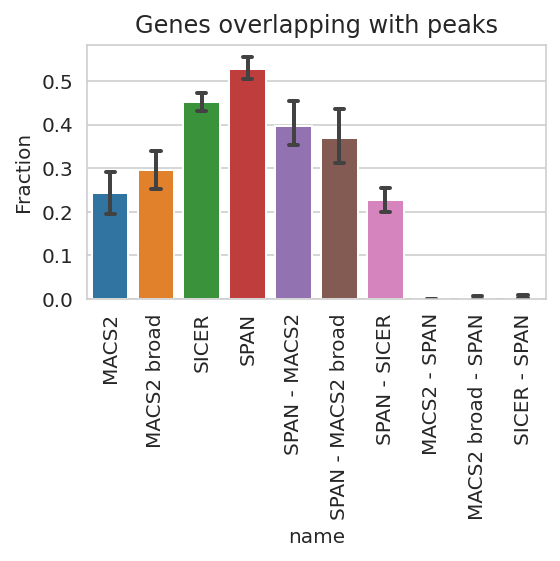

In [34]:
plt.figure(figsize=(4, 4))
ax = plt.axes()
ax.title.set_text('Genes overlapping with peaks')
g_results = sns.barplot(data=full_bench_df[full_bench_df['overlap'] == '1bp overlap'], x='name', y='sensitivity',
                        capsize=.2, errwidth=2, ax=ax,
                        order=['MACS2', 'MACS2 broad', 'SICER', 'SPAN',
                               'SPAN - MACS2', 'SPAN - MACS2 broad', 'SPAN - SICER',
                               'MACS2 - SPAN', 'MACS2 broad - SPAN', 'SICER - SPAN',
                               ])
ax.xaxis.set_tick_params(rotation=90)
ax.set_ylabel('Fraction')
plt.tight_layout()
plt.show()

## Compare genes expression overlapping peaks

In [35]:
import tempfile
from itertools import product

tf = tempfile.mktemp()

ts = []

for c, r in tqdm(product(GSE26320_CELLS, GSE26320_REPS)):
    if c == 'H1':  # Ignore H1, as expression is with different platform
        continue

    print(c, r)
    expr_file = [f for f in expr_files if c in f and r in f]
    if len(expr_file) == 0:
        continue
    expr_file = f'{PATH}/{expr_file[0]}_{TOP_GENES}.bed'
    genes = lines(expr_file)
    for tool in set(df_fdr_peaks['tool']):
        peaks_file = df_fdr_peaks[(df_fdr_peaks['tool'] == tool) & (df_fdr_peaks['modification'] == 'H3K36me3') &
                                  (df_fdr_peaks['cell'] == c) & (df_fdr_peaks['replicate'] == r)]['file'].values[0]

        for overlap, overlap_param in [
            ('1bp overlap', ''),
            ('50% overlap', ' -f 0.5 '),
            ('80% overlap', ' -f 0.8 '),
        ]:
            !bedtools intersect -a {expr_file} -b {peaks_file} -wa -u {overlap_param} > {tf}
            tf_expression = pd.read_csv(tf, sep='\t',
                                        names=['chromosome', 'start', 'end', 'gene_id', 'strand', 'expression']
                                        )[['expression']].copy()
            tf_expression['name'] = tool
            tf_expression['overlap'] = overlap
            ts.append(tf_expression)

peaks_expression = pd.concat(ts).reset_index(drop=True)

0it [00:00, ?it/s]

GM12878 rep1
GM12878 rep2
HMEC rep1
HMEC rep2
HSMM rep1
HSMM rep2
K562 rep1
K562 rep2
NHEK rep1
NHEK rep2
NHLF rep1
NHLF rep2
Huvec rep1
Huvec rep2
HepG2 rep1
HepG2 rep2


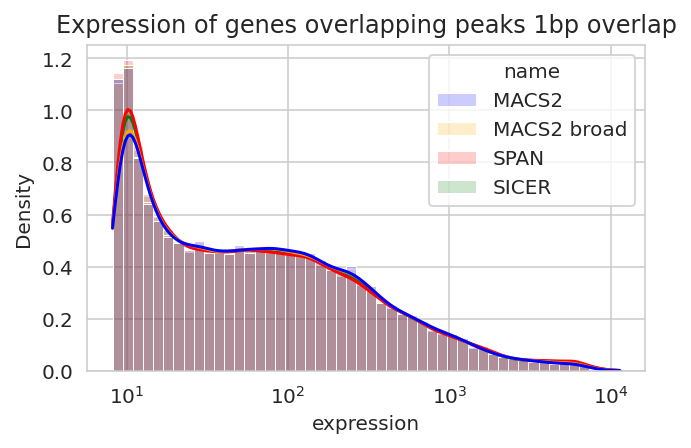

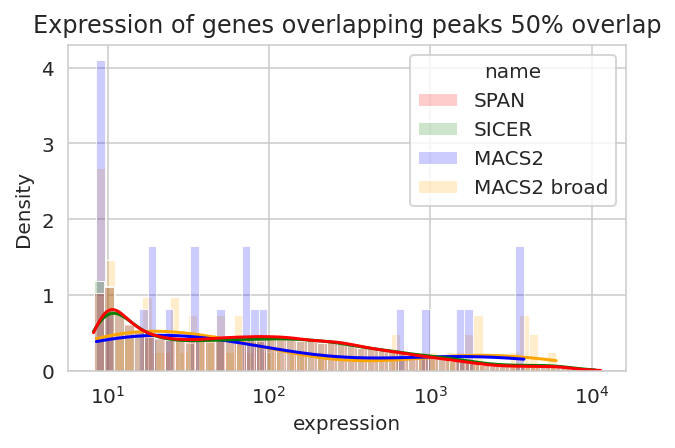

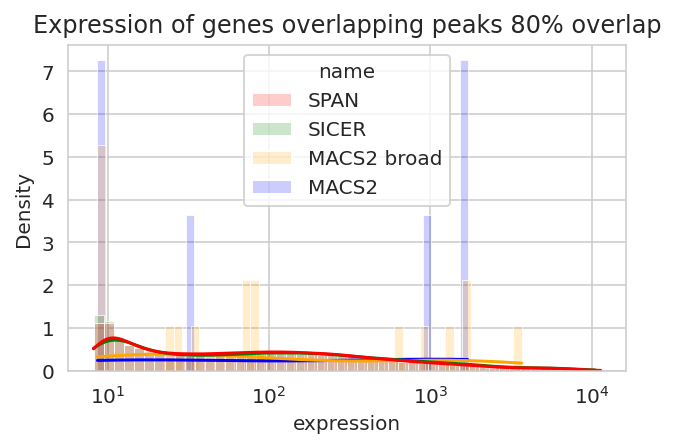

In [36]:
for overlap in peaks_expression['overlap'].unique():
    plt.figure(figsize=(5, 3))
    ax = plt.axes()
    g_results = sns.histplot(data=peaks_expression[peaks_expression['overlap'] == overlap], x='expression', hue='name',
                             ax=ax,
                             bins=50, stat='density', common_bins=False, common_norm=False,
                             kde=True, log_scale=True, alpha=0.2,
                             palette=TOOLS_PALETTE)
    g_results.set(xscale='log')
    ax.title.set_text(f'Expression of genes overlapping peaks {overlap}')
    plt.show()

## Compare ratio of peaks vs genes

In [37]:
import tempfile
from itertools import product

tf = tempfile.mktemp()

ratio_df = pd.DataFrame(columns=['cell', 'replicate', 'tool', 'genes', 'peaks'], dtype=object)

for c, r in tqdm(product(GSE26320_CELLS, GSE26320_REPS)):
    if c == 'H1':  # Ignore H1, as expression is with different platform
        continue

    print(c, r)
    expr_file = [f for f in expr_files if c in f and r in f]
    if len(expr_file) == 0:
        continue
    expr_file = f'{PATH}/{expr_file[0]}_{TOP_GENES}.bed'
    genes = lines(expr_file)
    for tool in set(df_fdr_peaks['tool']):
        peaks_file = df_fdr_peaks[(df_fdr_peaks['tool'] == tool) & (df_fdr_peaks['modification'] == 'H3K36me3') &
                                  (df_fdr_peaks['cell'] == c) & (df_fdr_peaks['replicate'] == r)]['file'].values[0]

        !bedtools intersect -a {expr_file} -b {peaks_file} -wa > {tf}
        tf_expression = pd.read_csv(tf, sep='\t',
                                    names=['chromosome', 'start', 'end', 'gene_id', 'strand', 'expression']
                                    )[['gene_id']].copy()
        genes = len(tf_expression["gene_id"].unique())
        peaks = len(tf_expression)
        ratio_df.loc[len(ratio_df)] = (c, r, tool, genes, peaks)

ratio_df

0it [00:00, ?it/s]

GM12878 rep1
GM12878 rep2
HMEC rep1
HMEC rep2
HSMM rep1
HSMM rep2
K562 rep1
K562 rep2
NHEK rep1
NHEK rep2
NHLF rep1
NHLF rep2
Huvec rep1
Huvec rep2
HepG2 rep1
HepG2 rep2


cell replicate         tool  genes  peaks
0   GM12878      rep1        MACS2    741   2596
1   GM12878      rep1  MACS2 broad   1440   7014
2   GM12878      rep1         SPAN   4707  18977
3   GM12878      rep1        SICER   4154  21728
4   GM12878      rep2        MACS2   2224  16763
5   GM12878      rep2  MACS2 broad   2873  30895
6   GM12878      rep2         SPAN   4670  19469
7   GM12878      rep2        SICER   4224  29858
8      HMEC      rep1        MACS2   1907  14769
9      HMEC      rep1  MACS2 broad   2261  20105
10     HMEC      rep1         SPAN   4825  23523
11     HMEC      rep1        SICER   4358  27319
12     HMEC      rep2        MACS2   1901  11933
13     HMEC      rep2  MACS2 broad   2491  19847
14     HMEC      rep2         SPAN   4951  16952
15     HMEC      rep2        SICER   3295  21129
16     HSMM      rep1        MACS2      0      0
17     HSMM      rep1  MACS2 broad      0      0
18     HSMM      rep1         SPAN   6500  29962
19     HSMM      rep1        SICER   4929  33153
20     HSMM      rep2        MACS2   1834  13119
21     HSMM      rep2  MACS2 broad   2218  18888
22     HSMM      rep2         SPAN   5250  38962
23     HSMM      rep2        SICER   4894  28605
24     K562      rep1        MACS2   2532  23101
25     K562      rep1  MACS2 broad   2823  28478
26     K562      rep1         SPAN   4819  23528
27     K562      rep1        SICER   4186  21133
28     K562      rep2        MACS2   1706  11655
29     K562      rep2  MACS2 broad   2112  16924
30     K562      rep2         SPAN   4369  16598
31     K562      rep2        SICER   3654  27012
32     NHEK      rep1        MACS2   3339  40572
33     NHEK      rep1  MACS2 broad   4281  69459
34     NHEK      rep1         SPAN   4993  21234
35     NHEK      rep1        SICER   4223  31356
36     NHEK      rep2        MACS2   3064  36768
37     NHEK      rep2  MACS2 broad   3777  58691
38     NHEK      rep2         SPAN   4935  23718
39     NHEK      rep2        SICER   4381  28696
40     NHLF      rep1        MACS2      0      0
41     NHLF      rep1  MACS2 broad      0      0
42     NHLF      rep1         SPAN   5402  21065
43     NHLF      rep1        SICER   4139  20327
44     NHLF      rep2        MACS2   3726  55755
45     NHLF      rep2  MACS2 broad   4017  61806
46     NHLF      rep2         SPAN   5129  29702
47     NHLF      rep2        SICER   4651  35049
48    HepG2      rep1        MACS2   1956  12793
49    HepG2      rep1  MACS2 broad   2345  18309
50    HepG2      rep1         SPAN   5042  22259
51    HepG2      rep1        SICER   4203  23957
52    HepG2      rep2        MACS2   1500   9082
53    HepG2      rep2  MACS2 broad   1837  12778
54    HepG2      rep2         SPAN   4597  22140
55    HepG2      rep2        SICER   4418  25873

In [38]:
ratio_df['peaks_to_genes'] = ratio_df['peaks'] / ratio_df['genes']
ratio_df.sort_values(by=['tool'], inplace=True)

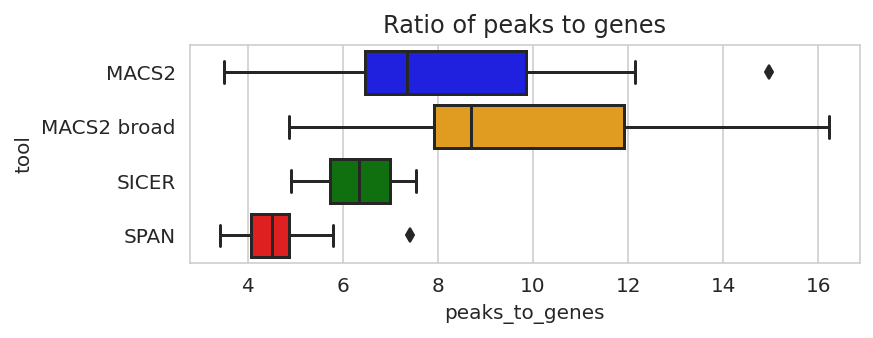

In [39]:
plt.figure(figsize=(6, 2))
ax = plt.axes()
g_results = sns.boxplot(data=ratio_df, x='peaks_to_genes', y='tool', ax=ax,
                        palette=TOOLS_PALETTE)
ax.title.set_text('Ratio of peaks to genes')
plt.show()

# Hg19 H3K36me3 vs RNA-seq quanitified

## Annotate quanitified RNA-seq with positions

  0%|          | 0/7 [00:00<?, ?it/s]

HSMM HSMM_hg19_ENCFF551YKI.tsv


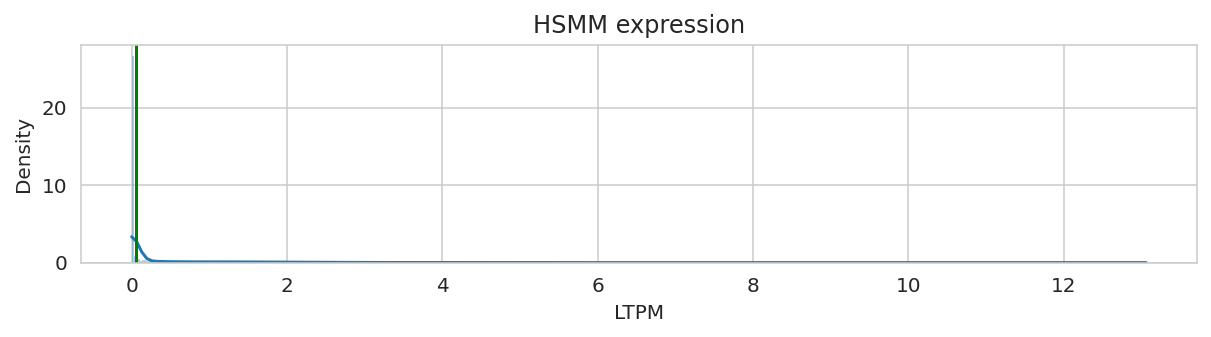

Total genes with positions 57820
Genes logTPM > 0.05 16274
Saved expressed genes fom HSMM to /home/jetbrains/data/2023_GSE26320_rnaseq/HSMM_hg19_ENCFF551YKI_tpm0.05.bed
NHLF NHLF_polyA_hg19_ENCFF458UOE.tsv


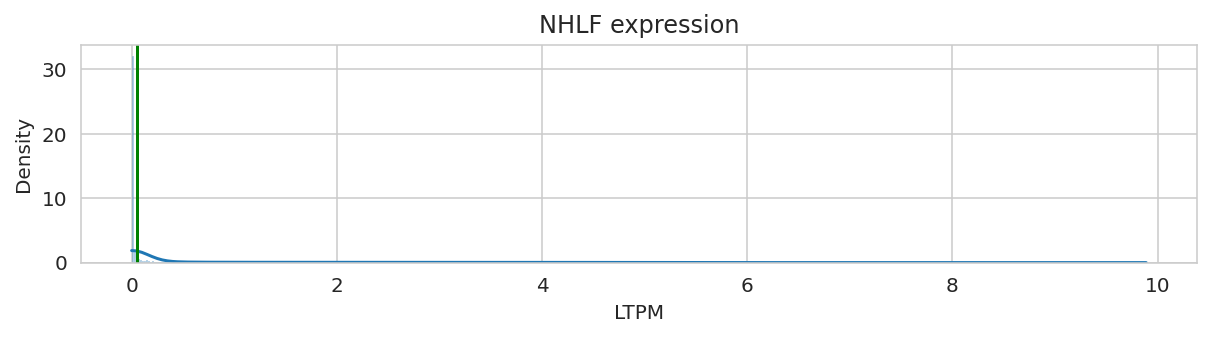

Total genes with positions 57820
Genes logTPM > 0.05 18999
Saved expressed genes fom NHLF to /home/jetbrains/data/2023_GSE26320_rnaseq/NHLF_polyA_hg19_ENCFF458UOE_tpm0.05.bed
H1 H1_hg19_ENCFF146JOZ.tsv


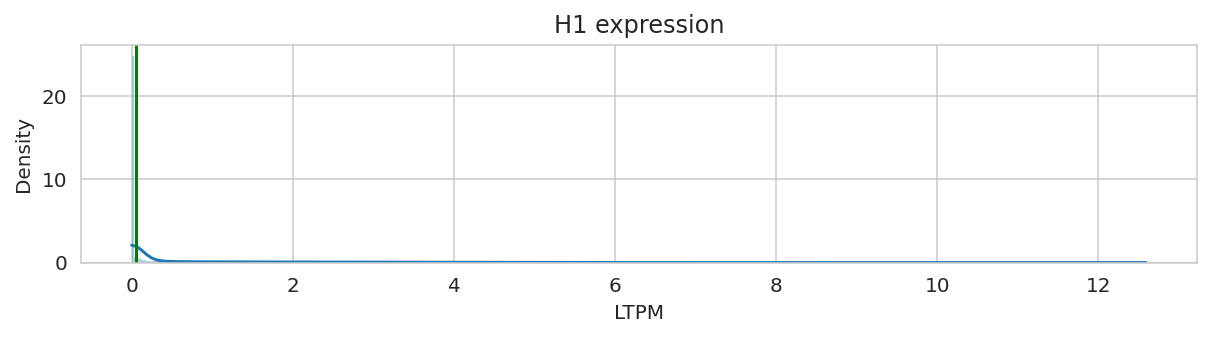

Total genes with positions 57820
Genes logTPM > 0.05 20557
Saved expressed genes fom H1 to /home/jetbrains/data/2023_GSE26320_rnaseq/H1_hg19_ENCFF146JOZ_tpm0.05.bed
K562 K562_hg19_ENCFF139IXQ.tsv


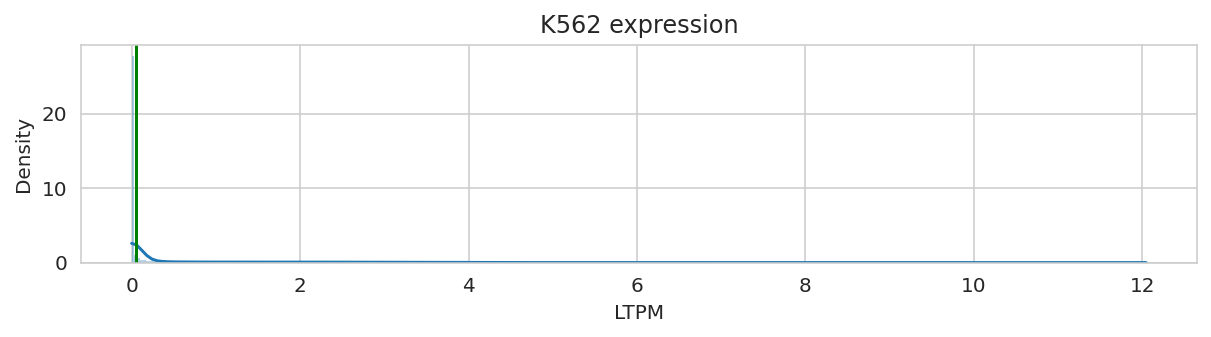

Total genes with positions 57820
Genes logTPM > 0.05 17506
Saved expressed genes fom K562 to /home/jetbrains/data/2023_GSE26320_rnaseq/K562_hg19_ENCFF139IXQ_tpm0.05.bed
GM12878 GM12878_hg19_ENCFF219RWY.tsv


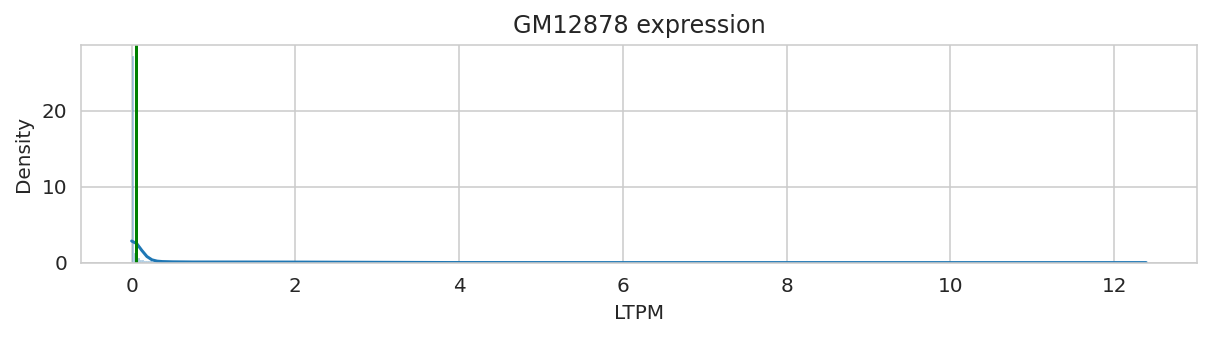

Total genes with positions 57820
Genes logTPM > 0.05 17131
Saved expressed genes fom GM12878 to /home/jetbrains/data/2023_GSE26320_rnaseq/GM12878_hg19_ENCFF219RWY_tpm0.05.bed
NHEK NHEK_polyA_hg19_ENCFF747WWG.tsv


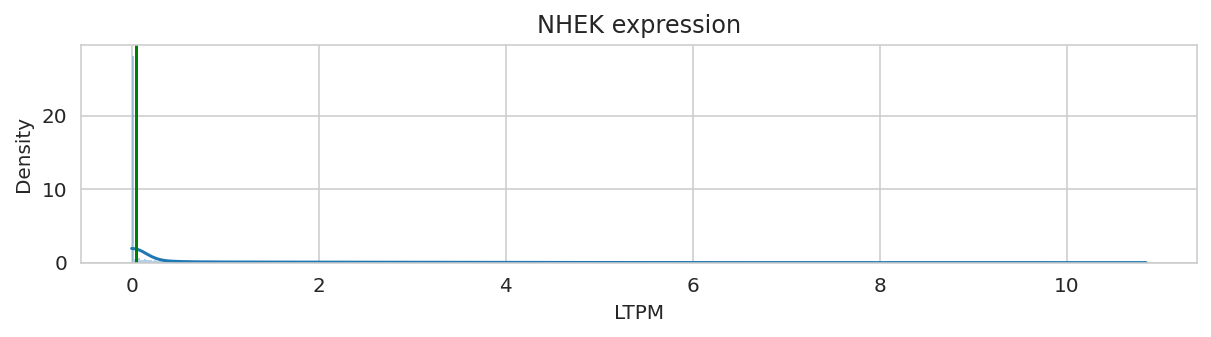

Total genes with positions 57820
Genes logTPM > 0.05 21899
Saved expressed genes fom NHEK to /home/jetbrains/data/2023_GSE26320_rnaseq/NHEK_polyA_hg19_ENCFF747WWG_tpm0.05.bed
HepG2 HepG2_hg19_ENCFF533XPJ.tsv


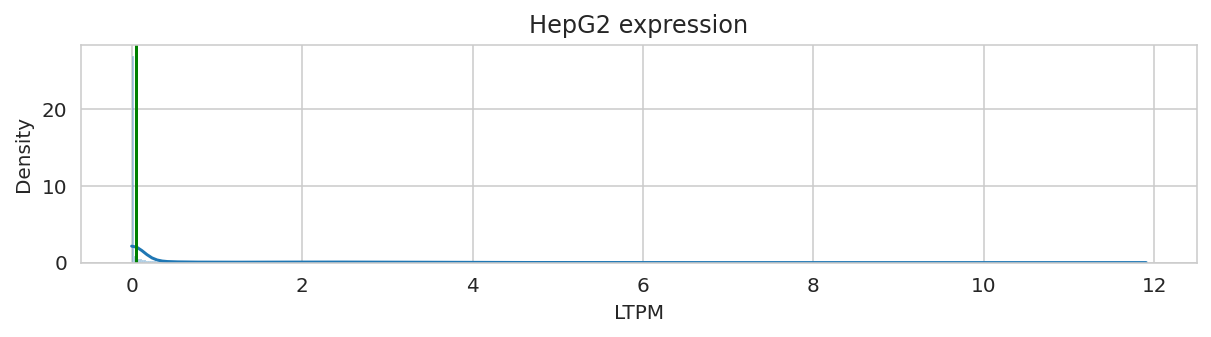

Total genes with positions 57820
Genes logTPM > 0.05 19052
Saved expressed genes fom HepG2 to /home/jetbrains/data/2023_GSE26320_rnaseq/HepG2_hg19_ENCFF533XPJ_tpm0.05.bed


In [40]:
import re

GSE26320_RNASEQ_PATH = os.path.expanduser('~/data/2023_GSE26320_rnaseq')

EXPRESSION_TSV = {
    'HSMM': 'HSMM_hg19_ENCFF551YKI.tsv',
    'NHLF': 'NHLF_polyA_hg19_ENCFF458UOE.tsv',
    'H1': 'H1_hg19_ENCFF146JOZ.tsv',
    'K562': 'K562_hg19_ENCFF139IXQ.tsv',
    # 'HMEC': 'HMEC_hg38_ENCFF292FVY.tsv',
    # 'Huvec': 'HUVEC_hg38_ENCFF454MTF.tsv',
    'GM12878': 'GM12878_hg19_ENCFF219RWY.tsv',
    'NHEK': 'NHEK_polyA_hg19_ENCFF747WWG.tsv',
    'HepG2': 'HepG2_hg19_ENCFF533XPJ.tsv',
}

EXPRESSION_BED = {}
THRESHOLD = 0.05


for cell, path in tqdm(EXPRESSION_TSV.items()):
    print(cell, path)
    t = pd.read_csv(GSE26320_RNASEQ_PATH + '/' + path, sep='\t')
    # Fix . in gene_id
    t['gene_id'] = [re.sub('\..*', '', id) for id in t['gene_id']]
    t['LTPM'] = np.log1p(t['TPM'])

    # Plot expression
    plt.figure(figsize=(10, 2))
    ax = plt.axes()
    g_results = sns.histplot(data=t, x='LTPM', ax=ax,
    stat = 'density',
    bins = 500, kde = True, alpha = 0.4)
    ax.axvline(x=THRESHOLD, color='green')
    ax.title.set_text(f'{cell} expression')
    plt.show()

    # Save expressed genes
    full_df = pd.merge(left=t, right=gtf_genes_df, left_on='gene_id', right_on='gene_id')
    full_df = full_df[['chromosome', 'start', 'end', 'gene_id', 'strand', 'TPM', 'LTPM']]
    full_df.sort_values(by=['chromosome', 'start'], inplace=True)

    print(f'Total genes with positions {len(full_df)}')
    full_df = full_df[full_df['LTPM'] > THRESHOLD]
    print(f'Genes logTPM > {THRESHOLD} {len(full_df)}')

    # Plot expressed genes lengths
    # plt.figure(figsize=(4, 2))
    # ax = plt.axes()
    # g_results = sns.histplot(x=full_df['end']-full_df['start'], ax=ax,
    #                          stat='density',
    #                          bins=100, log_scale=True, kde=True, alpha=0.4)
    # g_results.set(xscale='log')
    # ax.title.set_text(f'{cell} genes lengths')
    # plt.show()

    expr_path = GSE26320_RNASEQ_PATH + '/' + path.replace('.tsv', f'_tpm{THRESHOLD}.bed')
    full_df.to_csv(expr_path, sep='\t', index=False, header=None)
    print(f'Saved expressed genes fom {cell} to {expr_path}')
    EXPRESSION_BED[cell] = expr_path


## Expressed genes vs peaks lengths

In [41]:
genes_lengths = []
for cell, path in tqdm(EXPRESSION_BED.items()):
    t = pd.read_csv(
        path, sep='\t', names=['chromosome', 'start', 'end', 'gene_id', 'strand', 'TPM', 'logTPM']
    )
    genes_lengths.extend(t['end'] - t['start'])

  0%|          | 0/7 [00:00<?, ?it/s]

In [42]:
ts = []
ts.append(pd.DataFrame(dict(name=['Genes'] * len(genes_lengths), length=genes_lengths)))
for file, tool in tqdm(zip(df_fdr_peaks['file'], df_fdr_peaks['tool'])):
    lengths = bedl(file)
    t = pd.DataFrame(dict(name=[tool] * len(lengths), length=lengths))
    ts.append(t.sample(min(len(t), 10_000)))
t = pd.concat(ts).reset_index(drop=True)
del ts
t.sample(10)

0it [00:00, ?it/s]

name   length
718675         SPAN  13972.0
613998         SPAN  10901.0
762735         SPAN    968.0
120263        Genes   6171.0
528599        SICER   1599.0
335890  MACS2 broad    420.0
493876        SICER  60199.0
249406        MACS2    816.0
35268         Genes  38961.0
227738        MACS2    338.0

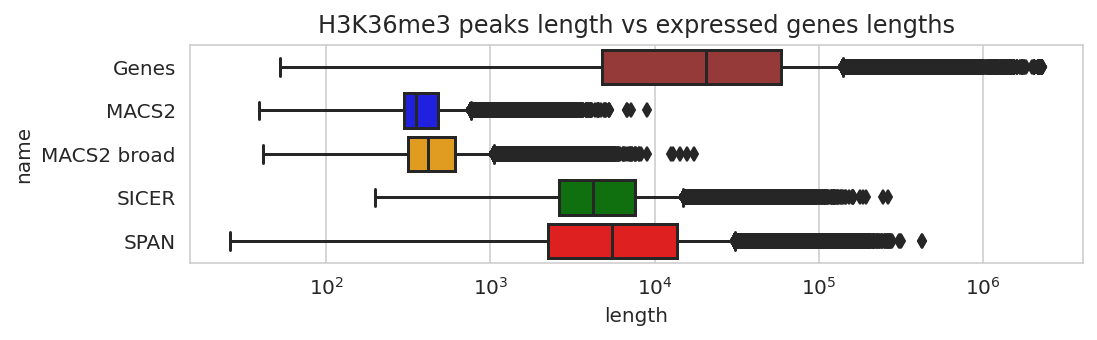

In [43]:
plt.figure(figsize=(8, 2))
ax = plt.axes()
g_results = sns.boxplot(data=t, x='length', y='name', ax=ax, palette=TOOLS_PALETTE)
g_results.set(xscale='log')
ax.title.set_text('H3K36me3 peaks length vs expressed genes lengths')
plt.show()

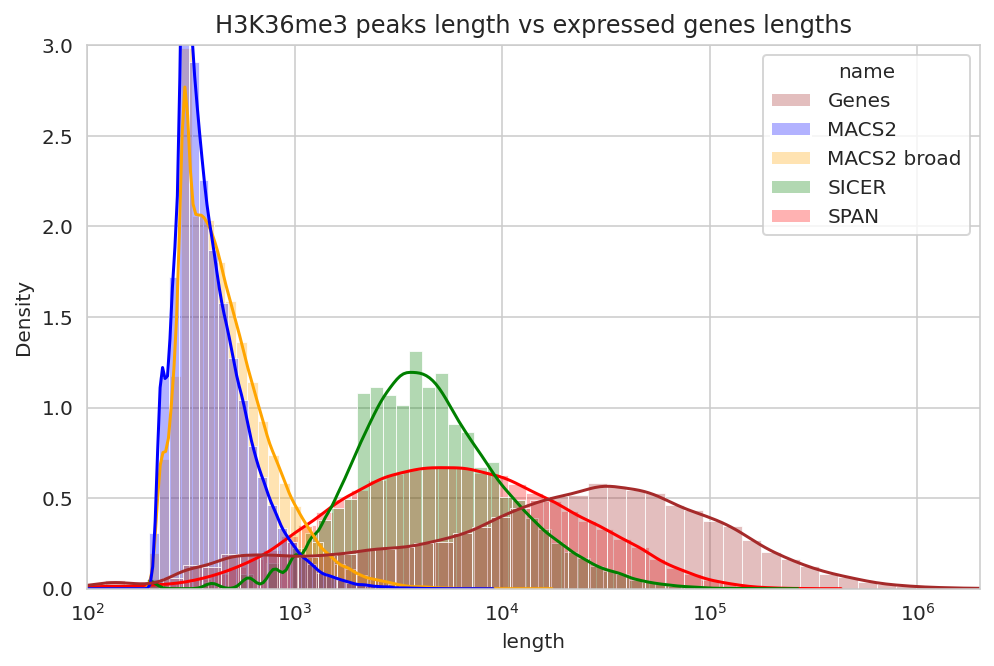

In [44]:
plt.figure(figsize=(8, 5))
ax = plt.axes()
g_results = sns.histplot(data=t, x='length', hue='name', ax=ax,
                         stat='density', common_bins=False, common_norm=False,
                         bins=50, kde=True, log_scale=True, alpha=0.3,
                         palette=TOOLS_PALETTE)
g_results.set(xscale='log')
g_results.set_ylim(0, 3)
g_results.set_xlim(1e2, 2e6)
ax.title.set_text('H3K36me3 peaks length vs expressed genes lengths')
plt.show()

## Overlap H3K36me3 vs genes

In [45]:
import tempfile
from itertools import product

tf = tempfile.mktemp()

bench_df = pd.DataFrame(
    columns=['cell', 'replicate', 'name', 'overlap', 'peaks', 'genes', 'peaks_overlap', 'genes_overlap'],
    dtype=object
)

for c, r in tqdm(product(GSE26320_CELLS, GSE26320_REPS)):
    print(c, r)
    if c not in EXPRESSION_BED:
        continue
    expr_file = EXPRESSION_BED[c]
    genes = lines(expr_file)
    for tool in set(df_fdr_peaks['tool']):
        peaks_file = df_fdr_peaks[(df_fdr_peaks['tool'] == tool) & (df_fdr_peaks['modification'] == 'H3K36me3') &
                                  (df_fdr_peaks['cell'] == c) & (df_fdr_peaks['replicate'] == r)]['file'].values[0]
        peaks = lines(peaks_file)
        for overlap, overlap_param in [
            ('1bp overlap', ''),
            ('50% overlap', ' -f 0.5 '),
            ('80% overlap', ' -f 0.8 '),
        ]:
            !bedtools intersect -a {peaks_file} -b {expr_file} -wa -u {overlap_param} > {tf}
            peaks_overlap = lines(tf)
            !bedtools intersect -b {peaks_file} -a {expr_file} -wa -u {overlap_param} > {tf}
            genes_overlap = lines(tf)
            bench_df.loc[len(bench_df)] = (c, r, tool, overlap, peaks, genes, peaks_overlap, genes_overlap)
bench_df

0it [00:00, ?it/s]

GM12878 rep1
GM12878 rep2
HMEC rep1
HMEC rep2
HSMM rep1
HSMM rep2
K562 rep1
K562 rep2
NHEK rep1
NHEK rep2
NHLF rep1
NHLF rep2
H1 rep1
H1 rep2
Huvec rep1
Huvec rep2
HepG2 rep1
HepG2 rep2


cell replicate         name      overlap  peaks  genes  peaks_overlap  \
0    GM12878      rep1        MACS2  1bp overlap   3627  17131           1735   
1    GM12878      rep1        MACS2  50% overlap   3627  17131           1723   
2    GM12878      rep1        MACS2  80% overlap   3627  17131           1721   
3    GM12878      rep1  MACS2 broad  1bp overlap  10199  17131           4931   
4    GM12878      rep1  MACS2 broad  50% overlap  10199  17131           4896   
..       ...       ...          ...          ...    ...    ...            ...   
163    HepG2      rep2         SPAN  50% overlap  29808  19052          15278   
164    HepG2      rep2         SPAN  80% overlap  29808  19052          14087   
165    HepG2      rep2        SICER  1bp overlap  35367  19052          19990   
166    HepG2      rep2        SICER  50% overlap  35367  19052          18363   
167    HepG2      rep2        SICER  80% overlap  35367  19052          17114   

     genes_overlap  
0             1019  
1                3  
2                0  
3             2012  
4                8  
..             ...  
163           2577  
164           1665  
165           7403  
166           2051  
167           1299  

[168 rows x 8 columns]

In [46]:
bench_df['precision'] = [d(a, b) for a, b in zip(bench_df['peaks_overlap'], bench_df['peaks'])]
bench_df['sensitivity'] = [d(a, b) for a, b in zip(bench_df['genes_overlap'], bench_df['genes'])]
bench_df['f1'] = [d(2, d(1, s + 1e-10) + d(1, p + 1e-10))
                  for s, p in zip(bench_df['sensitivity'], bench_df['precision'])]

In [47]:
print('Ignore outliers')
print(len(bench_df[bench_df['precision'] < 0.1]))
bench_df = bench_df[bench_df['precision'] >= 0.1]

Ignore outliers
18


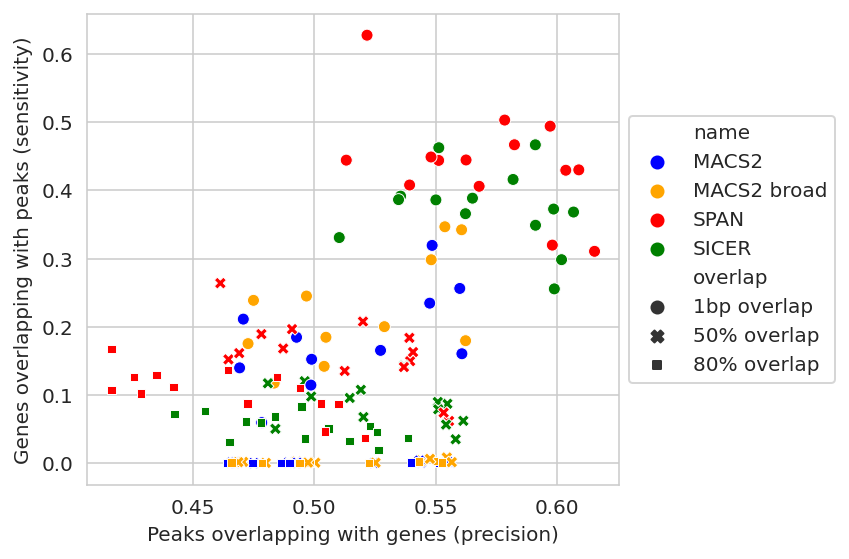

In [48]:
import seaborn as sns

plt.figure(figsize=(6, 4))
g_results = sns.scatterplot(data=bench_df, x='precision', y='sensitivity', hue='name', style='overlap',
                            palette=TOOLS_PALETTE)
# Put a legend to the right of the current axis
g_results.axes.legend(loc='center left', bbox_to_anchor=(1, 0.5))
g_results.axes.set_xlabel('Peaks overlapping with genes (precision)')
g_results.axes.set_ylabel('Genes overlapping with peaks (sensitivity)')
plt.tight_layout()
plt.show()

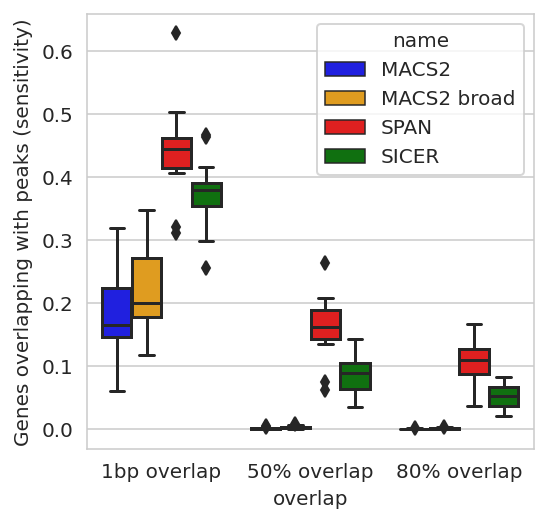

In [49]:
plt.figure(figsize=(4, 4))
g_results = sns.boxplot(data=bench_df, x='overlap', y='sensitivity', hue='name',
                        palette=TOOLS_PALETTE)
g_results.axes.set_ylabel('Genes overlapping with peaks (sensitivity)')
plt.show()

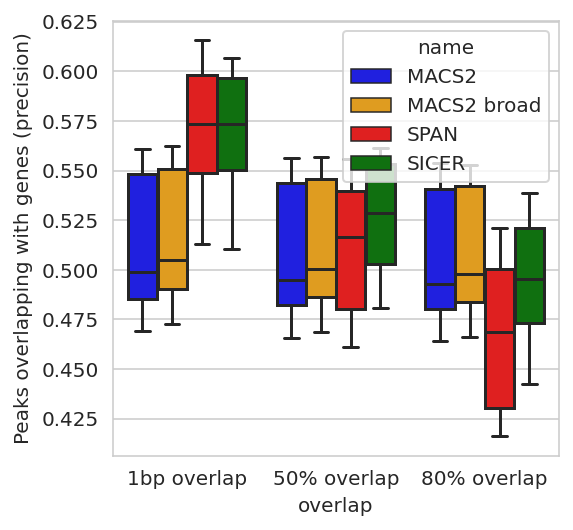

In [50]:
plt.figure(figsize=(4, 4))
g_results = sns.boxplot(data=bench_df, x='overlap', y='precision', hue='name',
                        palette=TOOLS_PALETTE)
g_results.axes.set_ylabel('Peaks overlapping with genes (precision)')
plt.show()

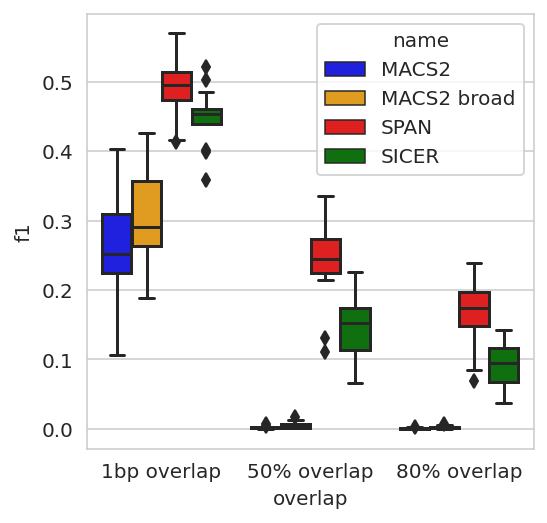

In [51]:
plt.figure(figsize=(4, 4))
sns.boxplot(data=bench_df, x='overlap', y='f1', hue='name',
            palette=TOOLS_PALETTE)
plt.show()

## Overlap H3K36me3 diff vs genes

In [52]:
TOOLS = list(sorted(set(bench_df['name'])))

diff_bench_df = pd.DataFrame(
    columns=['cell', 'replicate', 'name', 'overlap', 'peaks', 'peaks_overlap', 'genes', 'genes_overlap'],
    dtype=object
)

tf = tempfile.mktemp()
tf2 = tempfile.mktemp()

for c, r in tqdm(product(GSE26320_CELLS, GSE26320_REPS)):
    if c not in EXPRESSION_BED:
        continue
    print(c, r)
    expr_file = EXPRESSION_BED[c]
    span_file = df_fdr_peaks[(df_fdr_peaks['tool'] == 'SPAN') & (df_fdr_peaks['modification'] == 'H3K36me3') &
                             (df_fdr_peaks['cell'] == c) & (df_fdr_peaks['replicate'] == r)]['file'].values[0]
    genes = lines(expr_file)
    # Processing single tools information
    for tool in TOOLS:
        if tool == 'SPAN':
            continue
        peaks_file = df_fdr_peaks[(df_fdr_peaks['tool'] == tool) & (df_fdr_peaks['modification'] == 'H3K36me3') &
                                  (df_fdr_peaks['cell'] == c) & (df_fdr_peaks['replicate'] == r)]['file'].values[0]
        for name, args in [
            (f'SPAN - {tool}', f' -a {span_file} -b {peaks_file} '),
            (f'{tool} - SPAN', f' -b {span_file} -a {peaks_file} ')]:
            for overlap, overlap_param in [
                ('1bp overlap', ''),
                ('50% overlap', '-f 0.5'),
                ('80% overlap', '-f 0.8')
            ]:
                !bedtools intersect {args} -wa -v > {tf}
                !bedtools intersect -a {tf} -b {expr_file} -wa -u {overlap_param} > {tf2}
                peaks, peaks_overlap = lines(tf), lines(tf2)
                !bedtools intersect -b {tf} -a {expr_file} -wa -u {overlap_param} > {tf2}
                genes_overlap = lines(tf2)
                diff_bench_df.loc[len(diff_bench_df)] = \
                    (c, r, name, overlap, peaks, peaks_overlap, genes, genes_overlap)

display(diff_bench_df.head())

0it [00:00, ?it/s]

GM12878 rep1
GM12878 rep2
HSMM rep1
HSMM rep2
K562 rep1
K562 rep2
NHEK rep1
NHEK rep2
NHLF rep1
NHLF rep2
H1 rep1
H1 rep2
HepG2 rep1
HepG2 rep2


cell replicate          name      overlap  peaks  peaks_overlap  genes  \
0  GM12878      rep1  SPAN - MACS2  1bp overlap  23129          12596  17131   
1  GM12878      rep1  SPAN - MACS2  50% overlap  23129          11150  17131   
2  GM12878      rep1  SPAN - MACS2  80% overlap  23129          10118  17131   
3  GM12878      rep1  MACS2 - SPAN  1bp overlap     32              0  17131   
4  GM12878      rep1  MACS2 - SPAN  50% overlap     32              0  17131   

   genes_overlap  
0           6517  
1           2274  
2           1482  
3              0  
4              0

In [53]:
diff_bench_df['precision'] = [d(a, b) for a, b in zip(diff_bench_df['peaks_overlap'], diff_bench_df['peaks'])]
diff_bench_df['sensitivity'] = [d(a, b) for a, b in zip(diff_bench_df['genes_overlap'], diff_bench_df['genes'])]
diff_bench_df['f1'] = [d(2, d(1, s + 1e-10) + d(1, p + 1e-10))
                       for s, p in zip(diff_bench_df['sensitivity'], diff_bench_df['precision'])]

In [54]:
full_bench_df = pd.concat([
    bench_df[['cell', 'replicate', 'name', 'peaks', 'overlap', 'precision', 'sensitivity']],
    diff_bench_df[['cell', 'replicate', 'name', 'peaks', 'overlap', 'precision', 'sensitivity']]]).reset_index(drop=True)
full_bench_df

cell replicate          name  peaks      overlap  precision  \
0    GM12878      rep1         MACS2   3627  1bp overlap   0.478357   
1    GM12878      rep1         MACS2   3627  50% overlap   0.475048   
2    GM12878      rep1         MACS2   3627  80% overlap   0.474497   
3    GM12878      rep1   MACS2 broad  10199  1bp overlap   0.483479   
4    GM12878      rep1   MACS2 broad  10199  50% overlap   0.480047   
..       ...       ...           ...    ...          ...        ...   
397    HepG2      rep2  SPAN - SICER   5830  50% overlap   0.525043   
398    HepG2      rep2  SPAN - SICER   5830  80% overlap   0.518696   
399    HepG2      rep2  SICER - SPAN    357  1bp overlap   0.546218   
400    HepG2      rep2  SICER - SPAN    357  50% overlap   0.518207   
401    HepG2      rep2  SICER - SPAN    357  80% overlap   0.501401   

     sensitivity  
0       0.059483  
1       0.000175  
2       0.000000  
3       0.117448  
4       0.000467  
..           ...  
397     0.002152  
398     0.001102  
399     0.010603  
400     0.000105  
401     0.000052  

[402 rows x 7 columns]

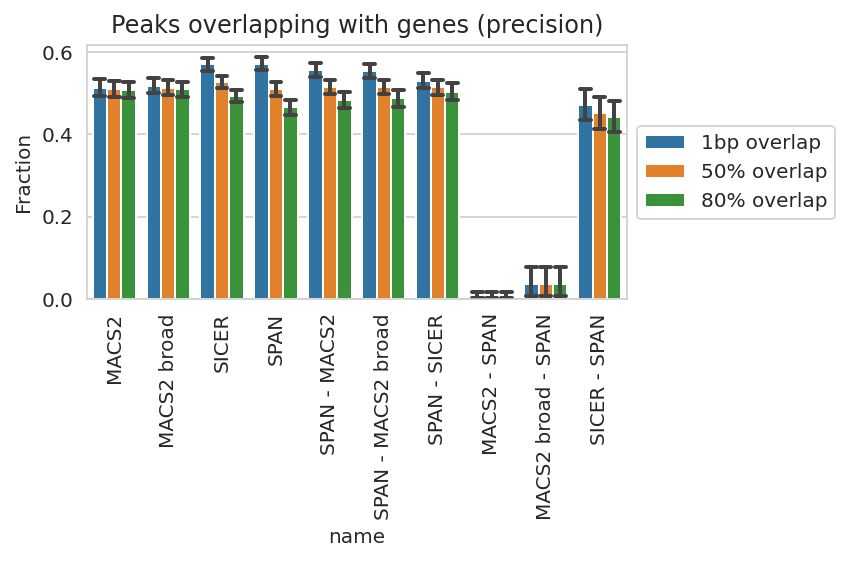

In [55]:
plt.figure(figsize=(6, 4))
ax = plt.axes()
ax.title.set_text('Peaks overlapping with genes (precision)')
g_results = sns.barplot(data=full_bench_df, x='name', y='precision',
                        hue='overlap',
                        capsize=.2, errwidth=2, ax=ax,
                        order=['MACS2', 'MACS2 broad', 'SICER', 'SPAN',
                               'SPAN - MACS2', 'SPAN - MACS2 broad', 'SPAN - SICER',
                               'MACS2 - SPAN', 'MACS2 broad - SPAN', 'SICER - SPAN',
                               ])
ax.xaxis.set_tick_params(rotation=90)
ax.set_ylabel('Fraction')
# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

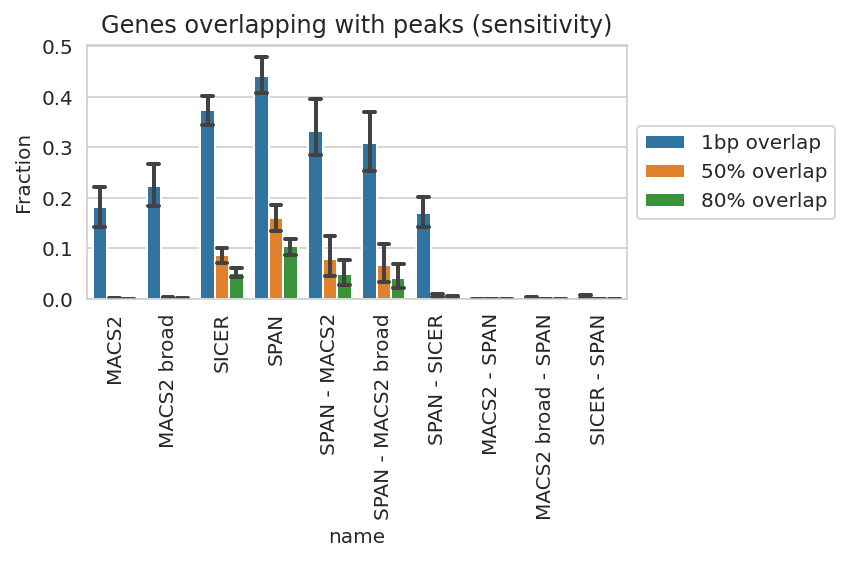

In [56]:
plt.figure(figsize=(6, 4))
ax = plt.axes()
ax.title.set_text('Genes overlapping with peaks (sensitivity)')
g_results = sns.barplot(data=full_bench_df, x='name', y='sensitivity',
                        hue='overlap',
                        capsize=.2, errwidth=2, ax=ax,
                        order=['MACS2', 'MACS2 broad', 'SICER', 'SPAN',
                               'SPAN - MACS2', 'SPAN - MACS2 broad', 'SPAN - SICER',
                               'MACS2 - SPAN', 'MACS2 broad - SPAN', 'SICER - SPAN',
                               ])
ax.xaxis.set_tick_params(rotation=90)
ax.set_ylabel('Fraction')
# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

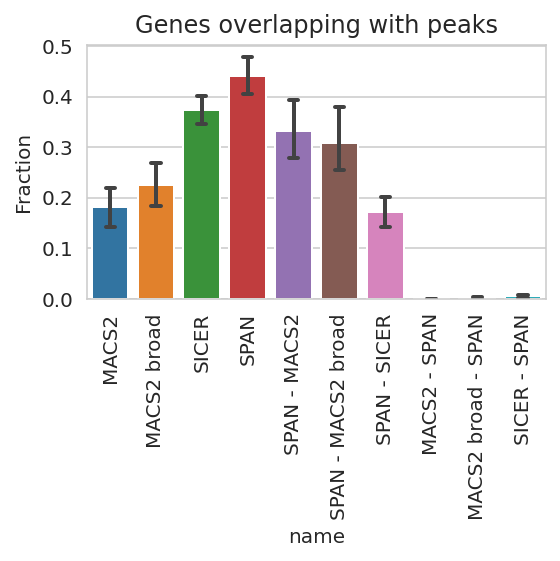

In [57]:
plt.figure(figsize=(4, 4))
ax = plt.axes()
ax.title.set_text('Genes overlapping with peaks')
g_results = sns.barplot(data=full_bench_df[full_bench_df['overlap'] == '1bp overlap'], x='name', y='sensitivity',
                        capsize=.2, errwidth=2, ax=ax,
                        order=['MACS2', 'MACS2 broad', 'SICER', 'SPAN',
                               'SPAN - MACS2', 'SPAN - MACS2 broad', 'SPAN - SICER',
                               'MACS2 - SPAN', 'MACS2 broad - SPAN', 'SICER - SPAN',
                               ])
ax.xaxis.set_tick_params(rotation=90)
ax.set_ylabel('Fraction')
plt.tight_layout()
plt.show()

# Hg19 Reproducing benchmark with quanitified RNA-seq

In [58]:
import tempfile
from itertools import product

tf = tempfile.mktemp()
expr_file = tempfile.mktemp()

benchmark_df = pd.DataFrame(
    columns=['cell', 'replicate', 'tpm', 'genes', 'peaks_file', 'peaks', 'pg', 'gp', 'overlap', 'tool'],
    dtype=object
)

for c, r in tqdm(product(GSE26320_CELLS, GSE26320_REPS)):
    if c == 'H1' or c not in EXPRESSION_TSV:  # Ignore H1, as expression is with different platform
        continue
    print(c, r)

    t = pd.read_csv(GSE26320_RNASEQ_PATH + '/' + EXPRESSION_TSV[c], sep='\t')
    # Fix . in gene_id
    t['gene_id'] = [re.sub('\..*', '', id) for id in t['gene_id']]
    t['LTPM'] = np.log1p(t['TPM'])
    full_df = pd.merge(left=t, right=gtf_genes_df, left_on='gene_id', right_on='gene_id')
    full_df = full_df[['chromosome', 'start', 'end', 'gene_id', 'strand', 'TPM', 'LTPM']]
    full_df.sort_values(by=['chromosome', 'start'], inplace=True)

    for tpm in np.linspace(0, 3, 7):
        print('Processing TMP', tpm)
        full_df[full_df['LTPM'] > tpm].to_csv(expr_file, sep='\t', index=False, header=None)
        genes = lines(expr_file)
        for tool in df_fdr_peaks['tool'].unique():
            peaks_file = df_fdr_peaks[(df_fdr_peaks['tool'] == tool) & (df_fdr_peaks['modification'] == 'H3K36me3') &
                                      (df_fdr_peaks['cell'] == c) & (df_fdr_peaks['replicate'] == r)]['file'].values[0]
            peaks = lines(peaks_file)
            for overlap, overlap_param in [
                ('1bp overlap', ''),
                ('50% overlap', ' -f 0.5 ')
            ]:
                !bedtools intersect -a {peaks_file} -b {expr_file} -wa -u {overlap_param} > {tf}
                peaks_overlap = lines(tf)
                !bedtools intersect -b {peaks_file} -a {expr_file} -wa -u {overlap_param} > {tf}
                genes_overlap = lines(tf)
                benchmark_df.loc[len(benchmark_df)] =\
                    (c, r, tpm, genes, peaks_file, peaks, peaks_overlap, genes_overlap, overlap, tool)

benchmark_df

0it [00:00, ?it/s]

GM12878 rep1
Processing TMP 0.0
Processing TMP 0.5
Processing TMP 1.0
Processing TMP 1.5
Processing TMP 2.0
Processing TMP 2.5
Processing TMP 3.0
GM12878 rep2
Processing TMP 0.0
Processing TMP 0.5
Processing TMP 1.0
Processing TMP 1.5
Processing TMP 2.0
Processing TMP 2.5
Processing TMP 3.0
HSMM rep1
Processing TMP 0.0
Processing TMP 0.5
Processing TMP 1.0
Processing TMP 1.5
Processing TMP 2.0
Processing TMP 2.5
Processing TMP 3.0
HSMM rep2
Processing TMP 0.0
Processing TMP 0.5
Processing TMP 1.0
Processing TMP 1.5
Processing TMP 2.0
Processing TMP 2.5
Processing TMP 3.0
K562 rep1
Processing TMP 0.0
Processing TMP 0.5
Processing TMP 1.0
Processing TMP 1.5
Processing TMP 2.0
Processing TMP 2.5
Processing TMP 3.0
K562 rep2
Processing TMP 0.0
Processing TMP 0.5
Processing TMP 1.0
Processing TMP 1.5
Processing TMP 2.0
Processing TMP 2.5
Processing TMP 3.0
NHEK rep1
Processing TMP 0.0
Processing TMP 0.5
Processing TMP 1.0
Processing TMP 1.5
Processing TMP 2.0
Processing TMP 2.5
Processing T

cell replicate  tpm  genes  \
0    GM12878      rep1  0.0  21459   
1    GM12878      rep1  0.0  21459   
2    GM12878      rep1  0.0  21459   
3    GM12878      rep1  0.0  21459   
4    GM12878      rep1  0.0  21459   
..       ...       ...  ...    ...   
667    HepG2      rep2  3.0   3995   
668    HepG2      rep2  3.0   3995   
669    HepG2      rep2  3.0   3995   
670    HepG2      rep2  3.0   3995   
671    HepG2      rep2  3.0   3995   

                                            peaks_file  peaks     pg    gp  \
0    /home/jetbrains/data/GSE26320_RAW/macs2/GSM646...   3627   1947  1175   
1    /home/jetbrains/data/GSE26320_RAW/macs2/GSM646...   3627   1934     4   
2    /home/jetbrains/data/GSE26320_RAW/macs2/GSM646...  10199   5489  2286   
3    /home/jetbrains/data/GSE26320_RAW/macs2/GSM646...  10199   5453    12   
4    /home/jetbrains/data/GSE26320_RAW/sicer/GSM646...  29427  17800  7772   
..                                                 ...    ...    ...   ...   
667  /home/jetbrains/data/GSE26320_RAW/macs2/GSM646...  19187   3217     3   
668  /home/jetbrains/data/GSE26320_RAW/sicer/GSM646...  35367   5523  1786   
669  /home/jetbrains/data/GSE26320_RAW/sicer/GSM646...  35367   4793   453   
670  /home/jetbrains/data/GSE26320_RAW/span/GSM6463...  29808   4486  1859   
671  /home/jetbrains/data/GSE26320_RAW/span/GSM6463...  29808   3727   614   

         overlap         tool  
0    1bp overlap        MACS2  
1    50% overlap        MACS2  
2    1bp overlap  MACS2 broad  
3    50% overlap  MACS2 broad  
4    1bp overlap        SICER  
..           ...          ...  
667  50% overlap  MACS2 broad  
668  1bp overlap        SICER  
669  50% overlap        SICER  
670  1bp overlap         SPAN  
671  50% overlap         SPAN  

[672 rows x 10 columns]

In [59]:
benchmark_df['p'] = (benchmark_df['pg'] + benchmark_df['gp']) / 2
benchmark_df['precision'] = [d(x, y) for x, y in zip(benchmark_df['pg'], benchmark_df['peaks'])]
benchmark_df['sensitivity'] = [d(x, y) for x, y in zip(benchmark_df['gp'], benchmark_df['genes'])]
benchmark_df['f1'] = [2 / (d(1, s + 1e-10) + d(1, p + 1e-10)) for s, p in zip(benchmark_df['sensitivity'], benchmark_df['precision'])]
benchmark_df

cell replicate  tpm  genes  \
0    GM12878      rep1  0.0  21459   
1    GM12878      rep1  0.0  21459   
2    GM12878      rep1  0.0  21459   
3    GM12878      rep1  0.0  21459   
4    GM12878      rep1  0.0  21459   
..       ...       ...  ...    ...   
667    HepG2      rep2  3.0   3995   
668    HepG2      rep2  3.0   3995   
669    HepG2      rep2  3.0   3995   
670    HepG2      rep2  3.0   3995   
671    HepG2      rep2  3.0   3995   

                                            peaks_file  peaks     pg    gp  \
0    /home/jetbrains/data/GSE26320_RAW/macs2/GSM646...   3627   1947  1175   
1    /home/jetbrains/data/GSE26320_RAW/macs2/GSM646...   3627   1934     4   
2    /home/jetbrains/data/GSE26320_RAW/macs2/GSM646...  10199   5489  2286   
3    /home/jetbrains/data/GSE26320_RAW/macs2/GSM646...  10199   5453    12   
4    /home/jetbrains/data/GSE26320_RAW/sicer/GSM646...  29427  17800  7772   
..                                                 ...    ...    ...   ...   
667  /home/jetbrains/data/GSE26320_RAW/macs2/GSM646...  19187   3217     3   
668  /home/jetbrains/data/GSE26320_RAW/sicer/GSM646...  35367   5523  1786   
669  /home/jetbrains/data/GSE26320_RAW/sicer/GSM646...  35367   4793   453   
670  /home/jetbrains/data/GSE26320_RAW/span/GSM6463...  29808   4486  1859   
671  /home/jetbrains/data/GSE26320_RAW/span/GSM6463...  29808   3727   614   

         overlap         tool        p  precision  sensitivity        f1  
0    1bp overlap        MACS2   1561.0   0.536807     0.054756  0.099375  
1    50% overlap        MACS2    969.0   0.533223     0.000186  0.000373  
2    1bp overlap  MACS2 broad   3887.5   0.538190     0.106529  0.177853  
3    50% overlap  MACS2 broad   2732.5   0.534660     0.000559  0.001117  
4    1bp overlap        SICER  12786.0   0.604887     0.362179  0.453076  
..           ...          ...      ...        ...          ...       ...  
667  50% overlap  MACS2 broad   1610.0   0.167666     0.000751  0.001495  
668  1bp overlap        SICER   3654.5   0.156163     0.447059  0.231470  
669  50% overlap        SICER   2623.0   0.135522     0.113392  0.123473  
670  1bp overlap         SPAN   3172.5   0.150497     0.465332  0.227436  
671  50% overlap         SPAN   2170.5   0.125034     0.153692  0.137889  

[672 rows x 14 columns]

In [80]:
import plotly.graph_objects as go

TOOLS_PALETTE = {'MACS2': "green", 'MACS2 broad': 'blue', 'SICER': "orange", 'SPAN': 'red', 'Genes': 'brown'}


def plot_tpm(benchmark_df):
    tools_legend_shown = set()
    fig = go.Figure()
    for overlap in benchmark_df['overlap'].unique():
        marker = 'square' if overlap == '1bp overlap' else  'circle' if overlap == '50% overlap' else 'diamond'
        for c, r, t in product(GSE26320_CELLS, GSE26320_REPS, df_fdr_peaks['tool'].unique()):
            dft = benchmark_df[(benchmark_df['cell'] == c) & (benchmark_df['replicate'] == r) &
                               (benchmark_df['overlap'] == overlap) & (benchmark_df['tool'] == t)]
            if len(dft) == 0:
                continue
            fig.add_trace(go.Scatter(
                x=dft["precision"], y=dft["sensitivity"], mode='lines+markers', name=t,
                hovertext=dft['tpm'].astype(str) + ' ' + t, marker_symbol=[marker] * len(dft),
                showlegend=t not in tools_legend_shown,
                marker_color=TOOLS_PALETTE[t],
                opacity=0.2
            ))
            tools_legend_shown.add(t)

    for overlap in set(benchmark_df['overlap']):
        marker = 'square' if overlap == '1bp overlap' else  'circle' if overlap == '50% overlap' else 'diamond'
        for c, r, t in product(GSE26320_CELLS, GSE26320_REPS, df_fdr_peaks['tool'].unique()):
            dft = benchmark_df[(benchmark_df['cell'] == c) & (benchmark_df['replicate'] == r) &
                               (benchmark_df['overlap'] == overlap) & (benchmark_df['tool'] == t) &
                               (benchmark_df['tpm'] != 1.0)]
            if len(dft) == 0:
                continue
            fig.add_trace(
                go.Scatter(
                    mode='markers',
                    x=dft["precision"], y=dft["sensitivity"],
                    name=t,
                    marker=dict(color='white', size=3, line=dict(width=1), symbol=marker),
                    showlegend=False,
                    hovertext=dft['tpm'].astype(str) + ' ' + t,
                    opacity=0.2
                )
            )

    for overlap in set(benchmark_df['overlap']):
        marker = 'square' if overlap == '1bp overlap' else  'circle' if overlap == '50% overlap' else 'diamond'
        for c, r, t in product(GSE26320_CELLS, GSE26320_REPS, df_fdr_peaks['tool'].unique()):
            dft = benchmark_df[(benchmark_df['cell'] == c) & (benchmark_df['replicate'] == r) &
                               (benchmark_df['overlap'] == overlap) & (benchmark_df['tool'] == t) &
                               (benchmark_df['tpm'] == 1.0)]
            if len(dft) == 0:
                continue
            fig.add_trace(
                go.Scatter(
                    mode='markers',
                    x=dft["precision"], y=dft["sensitivity"],
                    name=t,
                    marker=dict(color='white', size=10, line=dict(width=1), symbol=marker),
                    showlegend=False,
                    hovertext=dft['tpm'].astype(str) + ' ' + t
                )
            )

    # fig.update_xaxes(range=[-0.1, 1.1], title='Peaks overlapping active genes (precision)')
    # fig.update_yaxes(range=[-0.1, 1.1], title='Active genes overlapping peaks (sensitivity)')
    fig.update_xaxes(title='Peaks overlapping active genes (precision)')
    fig.update_yaxes(title='Active genes overlapping peaks (sensitivity)')

    fig.layout.template = 'plotly_white'
    fig.update_layout(
        autosize=False,
        width=1200,
        height=800,)
    fig.show()


In [61]:
plot_tpm(benchmark_df[benchmark_df['overlap'] == '1bp overlap'])

In [62]:
plot_tpm(benchmark_df[benchmark_df['overlap'] == '50% overlap'])

# Hg19 Overlap of H3K36me3 with all genes

In [63]:
gtf_df[gtf_df['type'] == 'gene'][['chromosome', 'start', 'end', 'gene_id', 'strand']].to_csv(
    os.path.expanduser('~/data/2022_GSE26320_GM12878_rnaseq/gtf_full.bed'),
    index=None, header=False, sep='\t'
)

In [64]:
import tempfile
from itertools import product

tf = tempfile.mktemp()

bench_df = pd.DataFrame(
    columns=['cell', 'replicate', 'name', 'overlap', 'peaks', 'genes', 'peaks_overlap', 'genes_overlap'],
    dtype=object
)

for c, r in tqdm(product(GSE26320_CELLS, GSE26320_REPS)):
    print(c, r)
    expr_file = os.path.expanduser('~/data/2022_GSE26320_GM12878_rnaseq/gtf_full.bed')
    genes = lines(expr_file)
    for tool in set(df_fdr_peaks['tool']):
        peaks_file = df_fdr_peaks[(df_fdr_peaks['tool'] == tool) & (df_fdr_peaks['modification'] == 'H3K36me3') &
                                  (df_fdr_peaks['cell'] == c) & (df_fdr_peaks['replicate'] == r)]['file'].values[0]
        peaks = lines(peaks_file)
        for overlap, overlap_param in [
            ('1bp overlap', ''),
            ('50% overlap', ' -f 0.5 '),
            ('80% overlap', ' -f 0.8 '),
        ]:
            !bedtools intersect -a {peaks_file} -b {expr_file} -wa -u {overlap_param} > {tf}
            peaks_overlap = lines(tf)
            !bedtools intersect -b {peaks_file} -a {expr_file} -wa -u {overlap_param} > {tf}
            genes_overlap = lines(tf)
            bench_df.loc[len(bench_df)] = (c, r, tool, overlap, peaks, genes, peaks_overlap, genes_overlap)
bench_df

0it [00:00, ?it/s]

GM12878 rep1
GM12878 rep2
HMEC rep1
HMEC rep2
HSMM rep1
HSMM rep2
K562 rep1
K562 rep2
NHEK rep1
NHEK rep2
NHLF rep1
NHLF rep2
H1 rep1
H1 rep2
Huvec rep1
Huvec rep2
HepG2 rep1
HepG2 rep2


cell replicate         name      overlap  peaks  genes  peaks_overlap  \
0    GM12878      rep1        MACS2  1bp overlap   3627  57820           2408   
1    GM12878      rep1        MACS2  50% overlap   3627  57820           2379   
2    GM12878      rep1        MACS2  80% overlap   3627  57820           2375   
3    GM12878      rep1  MACS2 broad  1bp overlap  10199  57820           6810   
4    GM12878      rep1  MACS2 broad  50% overlap  10199  57820           6732   
..       ...       ...          ...          ...    ...    ...            ...   
211    HepG2      rep2         SPAN  50% overlap  29808  57820          19729   
212    HepG2      rep2         SPAN  80% overlap  29808  57820          18179   
213    HepG2      rep2        SICER  1bp overlap  35367  57820          26424   
214    HepG2      rep2        SICER  50% overlap  35367  57820          23645   
215    HepG2      rep2        SICER  80% overlap  35367  57820          22052   

     genes_overlap  
0             1548  
1               16  
2                8  
3             3094  
4               55  
..             ...  
211           6885  
212           5455  
213          13704  
214           5918  
215           4629  

[216 rows x 8 columns]

In [65]:
bench_df['precision'] = [d(a, b) for a, b in zip(bench_df['peaks_overlap'], bench_df['peaks'])]
bench_df['sensitivity'] = [d(a, b) for a, b in zip(bench_df['genes_overlap'], bench_df['genes'])]
bench_df['f1'] = [d(2, d(1, s + 1e-10) + d(1, p + 1e-10))
                  for s, p in zip(bench_df['sensitivity'], bench_df['precision'])]

In [66]:
print('Ignore outliers')
print(len(bench_df[bench_df['precision'] < 0.3]))
bench_df = bench_df[bench_df['precision'] >= 0.3]

Ignore outliers
21


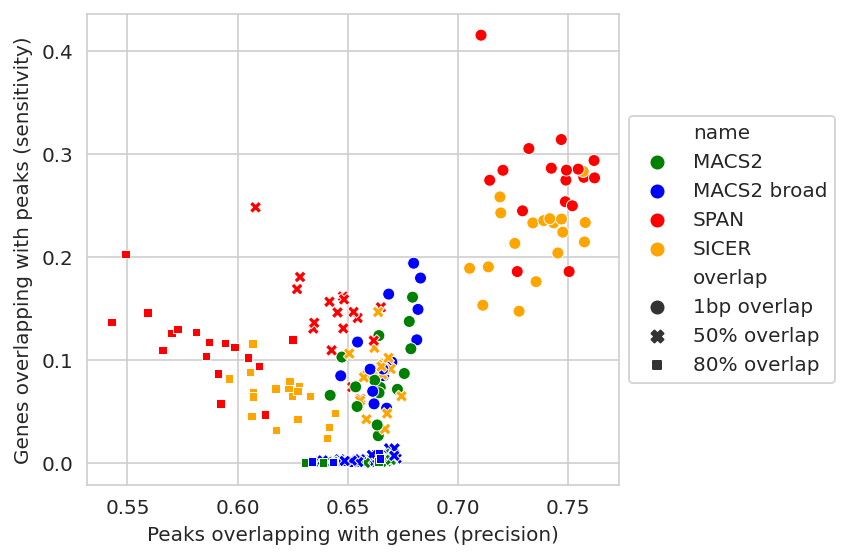

In [67]:
import seaborn as sns

plt.figure(figsize=(6, 4))
g_results = sns.scatterplot(data=bench_df, x='precision', y='sensitivity', hue='name', style='overlap',
                            palette=TOOLS_PALETTE)
# Put a legend to the right of the current axis
g_results.axes.legend(loc='center left', bbox_to_anchor=(1, 0.5))
g_results.axes.set_xlabel('Peaks overlapping with genes (precision)')
g_results.axes.set_ylabel('Genes overlapping with peaks (sensitivity)')
plt.tight_layout()
plt.show()

# Hg38 H3K36me3 vs RNA-seq quanitified

## Load hg38 GTF file

In [68]:
gtf_df = pd.read_csv(os.path.expanduser(
    '~/data/2023_Immune/gencode.GRCh38.p13.v41.annotation.gtf'),
    sep='\t', comment='#',
    names=['chromosome', 'db', 'type', 'start', 'end', 'point1', 'strand', 'point2', 'aux'])
gtf_df.sample(10)

chromosome      db        type      start        end point1 strand  \
2572360      chr16  HAVANA        exon   67029727   67029813      .      +   
2011840      chr12  HAVANA         CDS   10634567   10634618      .      -   
179300        chr1  HAVANA         UTR  147295431  147295616      .      +   
1073833       chr5  HAVANA         UTR  178204815  178204837      .      +   
20607         chr1  HAVANA         UTR    9239844    9239995      .      +   
2003127      chr12  HAVANA  transcript    6951375    6955189      .      +   
1496308       chr8  HAVANA        exon  119831677  119831731      .      -   
1186773       chr6  HAVANA  transcript  105137239  105160132      .      +   
3256358       chrX  HAVANA         CDS   12498680   12498796      .      +   
2582201      chr16  HAVANA         UTR   68352248   68352315      .      +   

        point2                                                aux  
2572360      .  gene_id "ENSG00000067955.15"; transcript_id "E...  
2011840      0  gene_id "ENSG00000060140.9"; transcript_id "EN...  
179300       .  gene_id "ENSG00000131778.20"; transcript_id "E...  
1073833      .  gene_id "ENSG00000197451.12"; transcript_id "E...  
20607        .  gene_id "ENSG00000049239.13"; transcript_id "E...  
2003127      .  gene_id "ENSG00000111679.17"; transcript_id "E...  
1496308      .  gene_id "ENSG00000064313.13"; transcript_id "E...  
1186773      .  gene_id "ENSG00000203808.13"; transcript_id "E...  
3256358      1  gene_id "ENSG00000169933.17"; transcript_id "E...  
2582201      .  gene_id "ENSG00000132600.18"; transcript_id "E...

In [69]:
import re

print('Parse GTF aux data')
auxes = {}
for i, aux in enumerate(tqdm(gtf_df['aux'])):
    for pair in aux.split(';'):
        kv = pair.strip().split(' ')
        if len(kv) != 2:
            continue
        k, v = kv
        if k not in auxes:
            auxes[k] = vs = []
        else:
            vs = auxes[k]
        vs.append(v.strip('"'))

for k, vs in auxes.items():
    if len(vs) == len(gtf_df):
        gtf_df[k] = vs
    else:
        print(f'Ignoring {k}')
del auxes
gtf_df.drop('aux', axis=1, inplace=True)

# Fix . in gene_id
gtf_df['gene_id'] = [re.sub('\..*', '', id) for id in gtf_df['gene_id']]

Parse GTF aux data


  0%|          | 0/3375759 [00:00<?, ?it/s]

Ignoring hgnc_id
Ignoring havana_gene
Ignoring transcript_id
Ignoring transcript_type
Ignoring transcript_name
Ignoring transcript_support_level
Ignoring tag
Ignoring havana_transcript
Ignoring exon_number
Ignoring exon_id
Ignoring ont
Ignoring protein_id
Ignoring ccdsid
Ignoring artif_dupl


In [70]:
print(f'Total hg38 records {len(gtf_df)}')
print(f'Total hg38 genes {sum(gtf_df["type"] == "gene")}')
print(f'Total hg38 protein_coding genes {sum((gtf_df["type"] == "gene") & (gtf_df["gene_type"] == "protein_coding"))}')

gtf_genes_df = gtf_df[gtf_df['type'] == 'gene']
gtf_genes_df.sample(5)

Total hg38 records 3375759
Total hg38 genes 61852
Total hg38 protein_coding genes 20017


chromosome      db  type      start        end point1 strand point2  \
184059        chr1  HAVANA  gene  149813225  149813693      .      -      .   
812437        chr4  HAVANA  gene   21949015   22330330      .      +      .   
2690150      chr17  HAVANA  gene   32495536   32500910      .      +      .   
2957538      chr19  HAVANA  gene   20340262   20424986      .      -      .   
867208        chr4  HAVANA  gene  103572089  103574082      .      +      .   

                 gene_id                           gene_type        gene_name  \
184059   ENSG00000183598                      protein_coding            H3C13   
812437   ENSG00000250039                              lncRNA  ENSG00000250039   
2690150  ENSG00000266718                              lncRNA  ENSG00000266718   
2957538  ENSG00000231205  transcribed_unprocessed_pseudogene          ZNF826P   
867208   ENSG00000251571                processed_pseudogene           DDX3P3   

        level  
184059      2  
812437      2  
2690150     2  
2957538     1  
867208      1

## Annotate quanitified RNA-seq with positions

In [71]:
import re

GSE26320_RNASEQ_PATH = os.path.expanduser('~/data/2023_GSE26320_rnaseq')

EXPRESSION_TSV = {
    ('GM12878', 'rep1') : 'GM12878_rep1_RNAseq_hg38_ENCFF723ICA.tsv',
    ('GM12878', 'rep2'): 'GM12878_rep2_RNAseq_hg38_ENCFF418FIT.tsv',
    ('H1', 'rep1') : 'H1_rep1_RNAseq_hg38_ENCFF093NEQ.tsv',
    ('H1', 'rep2') : 'H1_rep1_RNAseq_hg38_ENCFF093NEQ.tsv',
    ('HMEC', 'rep1') : 'HMEC_rep1_RNAseq_hg38_ENCFF292FVY.tsv',
    ('HMEC', 'rep2') : 'HMEC_rep2_RNAseq_hg38_ENCFF219EZH.tsv',
    ('HSMM', 'rep1') : 'HSMM_rep1_RNAseq_hg38_ENCFF551YKI.tsv',
    ('HSMM', 'rep2') : 'HSMM_rep2_RNAseq_hg38_ENCFF497BUG.tsv',
    ('HepG2', 'rep1') : 'HepG2_rep1_RNAseq_hg38_ENCFF773JNC.tsv',
    ('HepG2', 'rep2') : 'HepG2_rep2_RNAseq_hg38_ENCFF570ZOT.tsv',
    ('Huvec', 'rep1') : 'Huvec_rep1_RNAseq_hg38_ENCFF454MTF.tsv',
    ('Huvec', 'rep2') : 'Huvec_rep2_RNAseq_hg38_ENCFF134FYP.tsv',
    ('K562', 'rep1') : 'K562_rep1_RNAseq_hg38_ENCFF139IXQ.tsv',
    ('K562', 'rep2') : 'K562_rep2_RNAseq_hg38_ENCFF088RDE.tsv',
    ('NHEK', 'rep1') : 'NHEK_rep1_RNAseq_hg38_ENCFF004JWA.tsv',
    ('NHEK', 'rep2') : 'NHEK_rep1_RNAseq_hg38_ENCFF004JWA.tsv',
    ('NHLF', 'rep1') : 'NHLF_rep1_RNAseq_hg38_ENCFF577DEC.tsv',
    ('NHLF', 'rep2') : 'NHLF_rep2_RNAseq_hg38_ENCFF412KNK.tsv'
}

EXPRESSION_BED = {}
THRESHOLD = 0.05


for (cell, rep), path in tqdm(EXPRESSION_TSV.items()):
    print(cell, rep, path)
    t = pd.read_csv(GSE26320_RNASEQ_PATH + '/' + path, sep='\t')
    # Fix . in gene_id
    t['gene_id'] = [re.sub('\..*', '', id) for id in t['gene_id']]
    t['LTPM'] = np.log1p(t['TPM'])

    # Plot expression
    # plt.figure(figsize=(10, 2))
    # ax = plt.axes()
    # g_results = sns.histplot(data=t, x='LTPM', ax=ax,
    #                          stat = 'density',
    #                          bins = 500, kde = True, alpha = 0.4)
    # ax.axvline(x=THRESHOLD, color='green')
    # ax.title.set_text(f'{cell} expression')
    # plt.show()

    # Save expressed genes
    full_df = pd.merge(left=t, right=gtf_genes_df, left_on='gene_id', right_on='gene_id')
    full_df = full_df[['chromosome', 'start', 'end', 'gene_id', 'strand', 'TPM', 'LTPM']]
    full_df.sort_values(by=['chromosome', 'start'], inplace=True)

    print(f'Total genes with positions {len(full_df)}')
    full_df = full_df[full_df['LTPM'] > THRESHOLD]
    print(f'Genes logTPM > {THRESHOLD} {len(full_df)}')

    # Plot expressed genes lengths
    # plt.figure(figsize=(4, 2))
    # ax = plt.axes()
    # g_results = sns.histplot(x=full_df['end']-full_df['start'], ax=ax,
    #                          stat='density',
    #                          bins=100, log_scale=True, kde=True, alpha=0.4)
    # g_results.set(xscale='log')
    # ax.title.set_text(f'{cell} genes lengths')
    # plt.show()

    expr_path = GSE26320_RNASEQ_PATH + '/' + path.replace('.tsv', f'_tpm{THRESHOLD}.bed')
    full_df.to_csv(expr_path, sep='\t', index=False, header=None)
    print(f'Saved expressed genes fom {cell} to {expr_path}')
    EXPRESSION_BED[(cell, rep)] = expr_path


  0%|          | 0/18 [00:00<?, ?it/s]

GM12878 rep1 GM12878_rep1_RNAseq_hg38_ENCFF723ICA.tsv
Total genes with positions 58387
Genes logTPM > 0.05 17538
Saved expressed genes fom GM12878 to /home/jetbrains/data/2023_GSE26320_rnaseq/GM12878_rep1_RNAseq_hg38_ENCFF723ICA_tpm0.05.bed
GM12878 rep2 GM12878_rep2_RNAseq_hg38_ENCFF418FIT.tsv
Total genes with positions 56646
Genes logTPM > 0.05 17392
Saved expressed genes fom GM12878 to /home/jetbrains/data/2023_GSE26320_rnaseq/GM12878_rep2_RNAseq_hg38_ENCFF418FIT_tpm0.05.bed
H1 rep1 H1_rep1_RNAseq_hg38_ENCFF093NEQ.tsv
Total genes with positions 56646
Genes logTPM > 0.05 20899
Saved expressed genes fom H1 to /home/jetbrains/data/2023_GSE26320_rnaseq/H1_rep1_RNAseq_hg38_ENCFF093NEQ_tpm0.05.bed
H1 rep2 H1_rep1_RNAseq_hg38_ENCFF093NEQ.tsv
Total genes with positions 56646
Genes logTPM > 0.05 20899
Saved expressed genes fom H1 to /home/jetbrains/data/2023_GSE26320_rnaseq/H1_rep1_RNAseq_hg38_ENCFF093NEQ_tpm0.05.bed
HMEC rep1 HMEC_rep1_RNAseq_hg38_ENCFF292FVY.tsv
Total genes with positions 5

## Hg38 load peaks

In [72]:
GSE26320_PATH_HG38 = os.path.expanduser('~/data/2023_GSE26320')
GSE26320_CELLS = ['GM12878', 'HMEC', 'HSMM', 'K562', 'NHEK', 'NHLF', 'H1', 'Huvec', 'HepG2']
# GSE26320_CELLS = ['GM12878',  'K562', 'H1']
# GSE26320_MODIFICATIONS = ['CTCF', 'H3K27ac', 'H3K27me3', 'H3K36me3', 'H3K4me1', 'H3K4me2', 'H3K4me3', 'H3K9ac', 'H4K20me1']
GSE26320_MODIFICATIONS = ['H3K36me3']
GSE26320_REPS = ['rep1', 'rep2']

In [73]:
df_fdr_macs2 = load_peaks_fdr(os.path.join(GSE26320_PATH_HG38, 'macs2'), '.narrowPeak', ['0.05'])
df_fdr_macs2['file'] = [f'{GSE26320_PATH_HG38}/macs2/{f}' for f in df_fdr_macs2['file']]
df_fdr_macs2['tool'] = 'MACS2'
print('MACS2', len(df_fdr_macs2))

df_fdr_macs2broad = load_peaks_fdr(os.path.join(GSE26320_PATH_HG38, 'macs2'), '.broadPeak', ['0.1'])
df_fdr_macs2broad['file'] = [f'{GSE26320_PATH_HG38}/macs2/{f}' for f in df_fdr_macs2broad['file']]
df_fdr_macs2broad['tool'] = 'MACS2 broad'
print('MACS2 broad', len(df_fdr_macs2broad))

df_fdr_sicer = load_peaks_fdr(os.path.join(GSE26320_PATH_HG38, 'sicer'), 'summary-FDR', ['0.01'])
df_fdr_sicer['file'] = [f'{GSE26320_PATH_HG38}/sicer/{f}' for f in df_fdr_sicer['file']]
df_fdr_sicer['tool'] = 'SICER'
print('SICER', len(df_fdr_sicer))

df_fdr_span = load_peaks_fdr(os.path.join(GSE26320_PATH_HG38, 'span'), '.peak', ['0.05'])
df_fdr_span['file'] = [f'{GSE26320_PATH_HG38}/span/{f}' for f in df_fdr_span['file']]
df_fdr_span['tool'] = 'SPAN'
print('SPAN', len(df_fdr_span))

df_fdr_peaks = pd.concat([df_fdr_macs2, df_fdr_macs2broad, df_fdr_sicer, df_fdr_span])
df_fdr_peaks.sample(5)

  0%|          | 0/264 [00:00<?, ?it/s]

MACS2 17


  0%|          | 0/264 [00:00<?, ?it/s]

MACS2 broad 17


  0%|          | 0/33 [00:00<?, ?it/s]

SICER 17


  0%|          | 0/36 [00:00<?, ?it/s]

SPAN 17


file modification     cell  \
5   /home/jetbrains/data/2023_GSE26320/macs2/GSM64...     H3K36me3     HMEC   
1   /home/jetbrains/data/2023_GSE26320/macs2/GSM64...     H3K36me3     HMEC   
9   /home/jetbrains/data/2023_GSE26320/macs2/GSM64...     H3K36me3       H1   
10  /home/jetbrains/data/2023_GSE26320/macs2/GSM64...     H3K36me3     HSMM   
0   /home/jetbrains/data/2023_GSE26320/span/GSM646...     H3K36me3  GM12878   

   replicate   fdr  peaks      avlength         tool  
5       rep2   0.1  58049   3861.559786  MACS2 broad  
1       rep1  0.05      0      0.000000        MACS2  
9       rep2  0.05      0      0.000000        MACS2  
10      rep2   0.1  20947   1241.670502  MACS2 broad  
0       rep2  0.05  20266  19518.200385         SPAN

## Consistency analysis between replicates

In [74]:
reps_overlap = pd.DataFrame(columns=['modification', 'cell', 'tool', 'rep1', 'rep2',
                                     'peaks1', 'peaks2', 'overlap', 'peaks1_overlap', 'peaks2_overlap'], dtype=object)

tools = list(sorted(set(df_fdr_peaks['tool'])))
for c, m in tqdm(product(GSE26320_CELLS, GSE26320_MODIFICATIONS)):
    print(c, m)
    tm = df_fdr_peaks[(df_fdr_peaks['cell'] == c) & (df_fdr_peaks['modification'] == m)]
    reps = list(sorted(set(tm['replicate'])))
    for tool in tools:
        for i in range(len(reps)):
            for j in range(i + 1, len(reps)):
                rep1, rep2 = reps[i], reps[j]
                t1 = tm[(tm['tool'] == tool) & (tm['replicate'] == rep1)]
                t2 = tm[(tm['tool'] == tool) & (tm['replicate'] == rep2)]
                file1 = t1['file'].values[0]
                file2 = t2['file'].values[0]
                peaks1 = t1['peaks'].values[0]
                peaks2 = t2['peaks'].values[0]
                length1 = bedl(file1).sum()
                length2 = bedl(file2).sum()

                for overlap, overlap_param in [
                    ('1bp overlap', ''),
                    ('50% overlap', ' -f 0.5 '),
                    ('80% overlap', ' -f 0.8 ')
                ]:
                    overlap1 = !bedtools intersect -a {file1} -b {file2} -wa -u {overlap_param} | wc -l
                    overlap1 = int(overlap1[0])
                    overlap2 = !bedtools intersect -b {file1} -a {file2} -wa -u {overlap_param} | wc -l
                    overlap2 = int(overlap2[0])

                    reps_overlap.loc[len(reps_overlap)] = \
                        (m, c, tool, rep1, rep2, peaks1, peaks2, overlap, overlap1, overlap2)

reps_overlap['peak1_overlap_fraction'] = [d(x, y) for x, y in zip(reps_overlap['peaks1_overlap'], reps_overlap['peaks1'])]
reps_overlap['peak2_overlap_fraction'] = [d(x, y) for x, y in zip(reps_overlap['peaks2_overlap'], reps_overlap['peaks2'])]
reps_overlap

0it [00:00, ?it/s]

GM12878 H3K36me3
HMEC H3K36me3
HSMM H3K36me3
K562 H3K36me3
NHEK H3K36me3
NHLF H3K36me3
H1 H3K36me3
Huvec H3K36me3
HepG2 H3K36me3


modification     cell         tool  rep1  rep2  peaks1  peaks2  \
0      H3K36me3  GM12878        MACS2  rep1  rep2    1741   19751   
1      H3K36me3  GM12878        MACS2  rep1  rep2    1741   19751   
2      H3K36me3  GM12878        MACS2  rep1  rep2    1741   19751   
3      H3K36me3  GM12878  MACS2 broad  rep1  rep2   13794   39958   
4      H3K36me3  GM12878  MACS2 broad  rep1  rep2   13794   39958   
..          ...      ...          ...   ...   ...     ...     ...   
91     H3K36me3    HepG2        SICER  rep1  rep2   43335   41709   
92     H3K36me3    HepG2        SICER  rep1  rep2   43335   41709   
93     H3K36me3    HepG2         SPAN  rep1  rep2   15761   23393   
94     H3K36me3    HepG2         SPAN  rep1  rep2   15761   23393   
95     H3K36me3    HepG2         SPAN  rep1  rep2   15761   23393   

        overlap  peaks1_overlap  peaks2_overlap  peak1_overlap_fraction  \
0   1bp overlap             705             723                0.404940   
1   50% overlap             501             349                0.287766   
2   80% overlap             289             128                0.165997   
3   1bp overlap           11332            9295                0.821517   
4   50% overlap            9299            2354                0.674134   
..          ...             ...             ...                     ...   
91  50% overlap           31180           15473                0.719511   
92  80% overlap           24407            8334                0.563217   
93  1bp overlap           13613           18406                0.863714   
94  50% overlap           10168           16554                0.645137   
95  80% overlap            7098           13943                0.450352   

    peak2_overlap_fraction  
0                 0.036606  
1                 0.017670  
2                 0.006481  
3                 0.232619  
4                 0.058912  
..                     ...  
91                0.370975  
92                0.199813  
93                0.786817  
94                0.707648  
95                0.596033  

[96 rows x 12 columns]

In [75]:
t = pd.concat([
    reps_overlap[
        ['modification', 'cell', 'tool', 'peak1_overlap_fraction', 'overlap']
    ].copy().rename(dict(peak1_overlap_fraction='value'), axis=1),
    reps_overlap[
        ['modification', 'cell', 'tool', 'peak2_overlap_fraction', 'overlap']
    ].copy().rename(dict(peak2_overlap_fraction='value'), axis=1)
]).reset_index(drop=True)
t

modification     cell         tool     value      overlap
0       H3K36me3  GM12878        MACS2  0.404940  1bp overlap
1       H3K36me3  GM12878        MACS2  0.287766  50% overlap
2       H3K36me3  GM12878        MACS2  0.165997  80% overlap
3       H3K36me3  GM12878  MACS2 broad  0.821517  1bp overlap
4       H3K36me3  GM12878  MACS2 broad  0.674134  50% overlap
..           ...      ...          ...       ...          ...
187     H3K36me3    HepG2        SICER  0.370975  50% overlap
188     H3K36me3    HepG2        SICER  0.199813  80% overlap
189     H3K36me3    HepG2         SPAN  0.786817  1bp overlap
190     H3K36me3    HepG2         SPAN  0.707648  50% overlap
191     H3K36me3    HepG2         SPAN  0.596033  80% overlap

[192 rows x 5 columns]

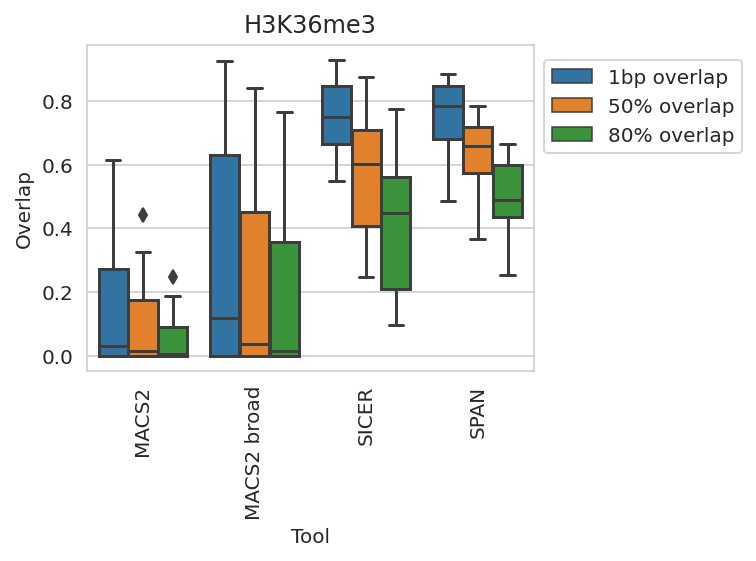

In [76]:
plt.figure(figsize=(len(GSE26320_MODIFICATIONS) * 4, 3))
for k, m in enumerate(GSE26320_MODIFICATIONS):
    ax = plt.subplot(1, len(GSE26320_MODIFICATIONS), k + 1)
    sns.boxplot(data=t[t['modification'] == m], x='tool', y='value', hue='overlap', ax=ax)
    ax.xaxis.set_tick_params(rotation=90)
    ax.set_title(m)
    ax.set_xlabel('Tool')
    if k == 0:
        ax.set_ylabel('Overlap')
    else:
        ax.set_ylabel(None)
    if k == len(GSE26320_MODIFICATIONS) - 1:
        # Put a legend to the right of the current axis
        ax.legend(loc='center left', bbox_to_anchor=(1, 0.81))
    else:
        ax.get_legend().remove()
plt.savefig(f'{GSE26320_PATH}/analyze/overlap.pdf', bbox_inches='tight', dpi=300)
plt.show()

## Expressed genes vs peaks lengths

In [77]:
genes_lengths = []
for (cell, rep), path in tqdm(EXPRESSION_BED.items()):
    t = pd.read_csv(
        path, sep='\t', names=['chromosome', 'start', 'end', 'gene_id', 'strand', 'TPM', 'logTPM']
    )
    genes_lengths.extend(t['end'] - t['start'])

  0%|          | 0/18 [00:00<?, ?it/s]

In [78]:
ts = []
ts.append(pd.DataFrame(dict(name=['Genes'] * len(genes_lengths), length=genes_lengths)))
for file, tool in tqdm(zip(df_fdr_peaks['file'], df_fdr_peaks['tool'])):
    lengths = bedl(file)
    t = pd.DataFrame(dict(name=[tool] * len(lengths), length=lengths))
    ts.append(t.sample(min(len(t), 10_000)))
t = pd.concat(ts).reset_index(drop=True)
del ts
t.sample(10)

0it [00:00, ?it/s]

name    length
651646        SICER    2199.0
700841        SICER   23999.0
820250         SPAN    9693.0
870494         SPAN    2240.0
70620         Genes  123011.0
690941        SICER    8399.0
356324        MACS2     691.0
619637        SICER    2199.0
575189  MACS2 broad     294.0
591231        SICER    2199.0

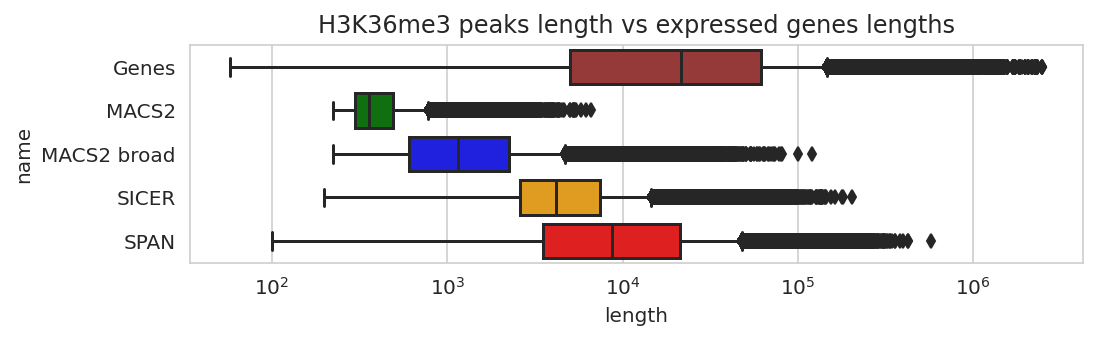

In [81]:
plt.figure(figsize=(8, 2))
ax = plt.axes()
g_results = sns.boxplot(data=t, x='length', y='name', ax=ax,
                        palette=TOOLS_PALETTE)
g_results.set(xscale='log')
ax.title.set_text('H3K36me3 peaks length vs expressed genes lengths')
plt.show()

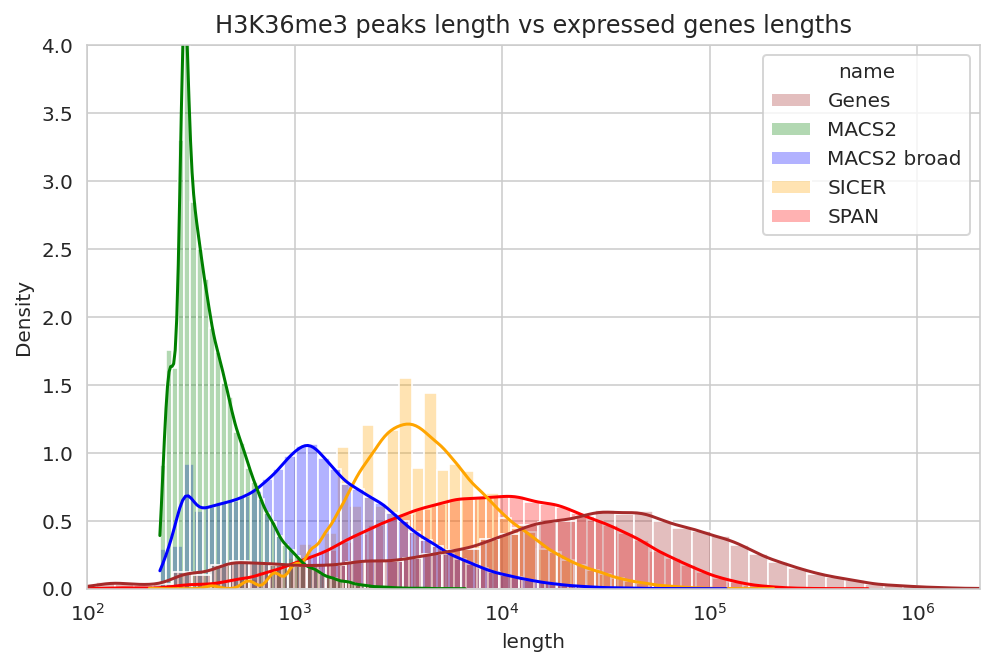

In [82]:
plt.figure(figsize=(8, 5))
ax = plt.axes()
g_results = sns.histplot(data=t, x='length', hue='name', ax=ax,
                         stat='density', common_bins=False, common_norm=False,
                         bins=50, kde=True, log_scale=True, alpha=0.3,
                         palette=TOOLS_PALETTE)
g_results.set(xscale='log')
g_results.set_ylim(0, 4)
g_results.set_xlim(1e2, 2e6)
ax.title.set_text('H3K36me3 peaks length vs expressed genes lengths')
plt.show()

## Overlap H3K36me3 vs genes

In [83]:
import tempfile
from itertools import product

tf = tempfile.mktemp()

bench_df = pd.DataFrame(
    columns=['cell', 'replicate', 'name', 'overlap', 'peaks', 'genes', 'peaks_overlap', 'genes_overlap'],
    dtype=object
)

for c, r in tqdm(product(GSE26320_CELLS, GSE26320_REPS)):
    print(c, r)
    if (c, r) not in EXPRESSION_BED:
        continue
    expr_file = EXPRESSION_BED[c, r]
    genes = lines(expr_file)
    for tool in set(df_fdr_peaks['tool']):
        t = df_fdr_peaks[(df_fdr_peaks['tool'] == tool) & (df_fdr_peaks['modification'] == 'H3K36me3') &
                         (df_fdr_peaks['cell'] == c) & (df_fdr_peaks['replicate'] == r)]
        if len(t) == 0:
            continue
        peaks_file = t['file'].values[0]
        peaks = lines(peaks_file)
        for overlap, overlap_param in [
            ('1bp overlap', ''),
            ('50% overlap', ' -f 0.5 '),
        ]:
            !bedtools intersect -a {peaks_file} -b {expr_file} -wa -u {overlap_param} > {tf}
            peaks_overlap = lines(tf)
            !bedtools intersect -b {peaks_file} -a {expr_file} -wa -u {overlap_param} > {tf}
            genes_overlap = lines(tf)
            bench_df.loc[len(bench_df)] = (c, r, tool, overlap, peaks, genes, peaks_overlap, genes_overlap)
bench_df

0it [00:00, ?it/s]

GM12878 rep1
GM12878 rep2
HMEC rep1
HMEC rep2
HSMM rep1
HSMM rep2
K562 rep1
K562 rep2
NHEK rep1
NHEK rep2
NHLF rep1
NHLF rep2
H1 rep1
H1 rep2
Huvec rep1
Huvec rep2
HepG2 rep1
HepG2 rep2


cell replicate         name      overlap  peaks  genes  peaks_overlap  \
0    GM12878      rep1        MACS2  1bp overlap   1741  17538           1712   
1    GM12878      rep1        MACS2  50% overlap   1741  17538           1706   
2    GM12878      rep1  MACS2 broad  1bp overlap  13794  17538          13582   
3    GM12878      rep1  MACS2 broad  50% overlap  13794  17538          13483   
4    GM12878      rep1         SPAN  1bp overlap  19231  17538          18593   
..       ...       ...          ...          ...    ...    ...            ...   
131    HepG2      rep2  MACS2 broad  50% overlap   4769  18356           4729   
132    HepG2      rep2         SPAN  1bp overlap  23393  18356          22922   
133    HepG2      rep2         SPAN  50% overlap  23393  18356          22684   
134    HepG2      rep2        SICER  1bp overlap  41709  18356          41094   
135    HepG2      rep2        SICER  50% overlap  41709  18356          40784   

     genes_overlap  
0             1236  
1                4  
2             5238  
3              144  
4            12175  
..             ...  
131             52  
132          11958  
133           6307  
134          11316  
135           3445  

[136 rows x 8 columns]

In [84]:
bench_df[(bench_df['overlap'] == '1bp overlap') & (bench_df['peaks'] < 5000)]

cell replicate         name      overlap  peaks  genes  peaks_overlap  \
0    GM12878      rep1        MACS2  1bp overlap   1741  17538           1712   
16      HMEC      rep1        MACS2  1bp overlap      0  21647              0   
18      HMEC      rep1  MACS2 broad  1bp overlap      0  21647              0   
32      HSMM      rep1        MACS2  1bp overlap    529  15729            515   
34      HSMM      rep1  MACS2 broad  1bp overlap   2519  15729           2467   
72      NHLF      rep1        MACS2  1bp overlap      3  18932              0   
74      NHLF      rep1  MACS2 broad  1bp overlap      3  18932              0   
96        H1      rep2        MACS2  1bp overlap      0  20899              0   
98        H1      rep2  MACS2 broad  1bp overlap      0  20899              0   
112    Huvec      rep2        MACS2  1bp overlap   3389  20945           3338   
128    HepG2      rep2        MACS2  1bp overlap   3561  18356           3539   
130    HepG2      rep2  MACS2 broad  1bp overlap   4769  18356           4739   

     genes_overlap  
0             1236  
16               0  
18               0  
32             430  
34            1563  
72               0  
74               0  
96               0  
98               0  
112           1653  
128           1477  
130           2408

In [85]:
bench_df['precision'] = [d(a, b) for a, b in zip(bench_df['peaks_overlap'], bench_df['peaks'])]
bench_df['sensitivity'] = [d(a, b) for a, b in zip(bench_df['genes_overlap'], bench_df['genes'])]
bench_df['f1'] = [d(2, d(1, s + 1e-10) + d(1, p + 1e-10))
                  for s, p in zip(bench_df['sensitivity'], bench_df['precision'])]

In [86]:
print('Ignore outliers')
print(len(bench_df[bench_df['precision'] < 0.1]))
bench_df = bench_df[bench_df['precision'] >= 0.1]

Ignore outliers
12


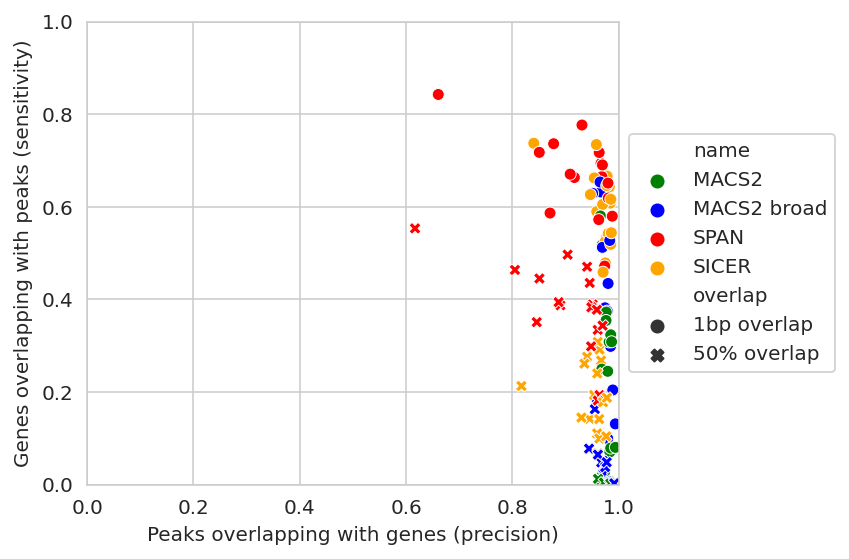

In [87]:
import seaborn as sns

plt.figure(figsize=(6, 4))
g_results = sns.scatterplot(data=bench_df, x='precision', y='sensitivity', hue='name', style='overlap',
                            palette=TOOLS_PALETTE)
# Put a legend to the right of the current axis
g_results.axes.legend(loc='center left', bbox_to_anchor=(1, 0.5))
g_results.axes.set_xlabel('Peaks overlapping with genes (precision)')
g_results.axes.set_xlim([0, 1])
g_results.axes.set_ylim([0, 1])
g_results.axes.set_ylabel('Genes overlapping with peaks (sensitivity)')
plt.tight_layout()
plt.show()

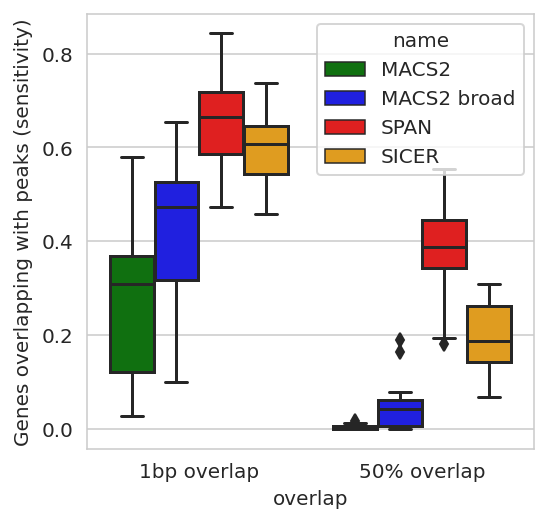

In [88]:
plt.figure(figsize=(4, 4))
g_results = sns.boxplot(data=bench_df, x='overlap', y='sensitivity', hue='name',
                        palette=TOOLS_PALETTE)
g_results.axes.set_ylabel('Genes overlapping with peaks (sensitivity)')
plt.show()

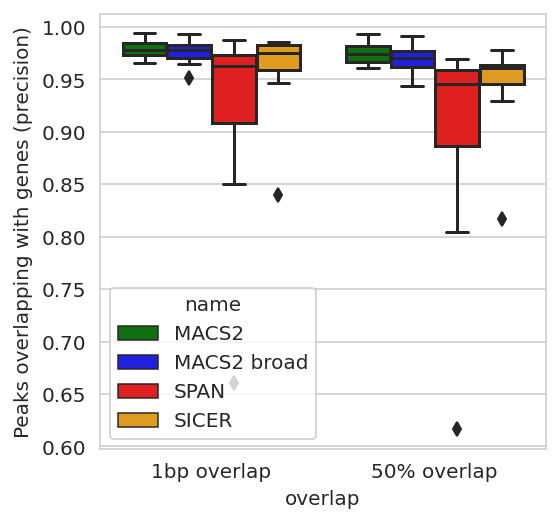

In [89]:
plt.figure(figsize=(4, 4))
g_results = sns.boxplot(data=bench_df, x='overlap', y='precision', hue='name',
                        palette=TOOLS_PALETTE)
g_results.axes.set_ylabel('Peaks overlapping with genes (precision)')
plt.show()

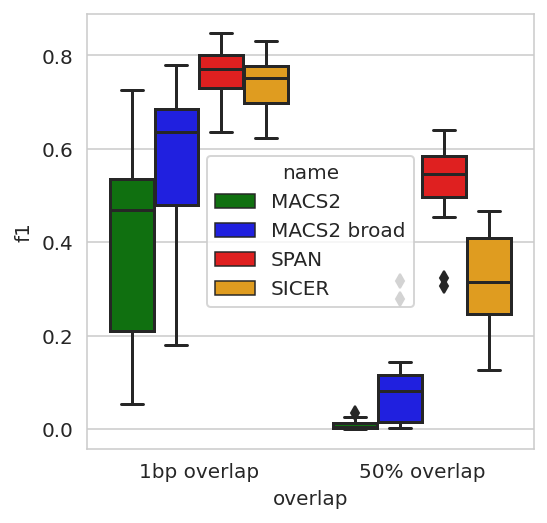

In [90]:
plt.figure(figsize=(4, 4))
sns.boxplot(data=bench_df, x='overlap', y='f1', hue='name',
            palette=TOOLS_PALETTE)
plt.show()

## Overlap H3K36me3 diff vs genes

In [91]:
TOOLS = list(sorted(set(bench_df['name'])))

diff_bench_df = pd.DataFrame(
    columns=['cell', 'replicate', 'name', 'overlap', 'peaks', 'peaks_overlap', 'genes', 'genes_overlap'],
    dtype=object
)

tf = tempfile.mktemp()
tf2 = tempfile.mktemp()

for c, r in tqdm(product(GSE26320_CELLS, GSE26320_REPS)):
    if (c, r) not in EXPRESSION_BED:
        continue
    print(c, r)
    expr_file = EXPRESSION_BED[(c, r)]
    t = df_fdr_peaks[(df_fdr_peaks['tool'] == 'SPAN') & (df_fdr_peaks['modification'] == 'H3K36me3') &
                     (df_fdr_peaks['cell'] == c) & (df_fdr_peaks['replicate'] == r)]
    if len(t) == 0:
        continue
    span_file = t['file'].values[0]
    genes = lines(expr_file)
    # Processing single tools information
    for tool in TOOLS:
        if tool == 'SPAN':
            continue
        t = df_fdr_peaks[(df_fdr_peaks['tool'] == tool) & (df_fdr_peaks['modification'] == 'H3K36me3') &
                         (df_fdr_peaks['cell'] == c) & (df_fdr_peaks['replicate'] == r)]
        if len(t) == 0:
            continue
        peaks_file = t['file'].values[0]
        for name, args in [
            (f'SPAN - {tool}', f' -a {span_file} -b {peaks_file} '),
            (f'{tool} - SPAN', f' -b {span_file} -a {peaks_file} ')]:
            for overlap, overlap_param in [
                ('1bp overlap', ''),
                ('50% overlap', '-f 0.5'),
            ]:
                !bedtools intersect {args} -wa -v > {tf}
                !bedtools intersect -a {tf} -b {expr_file} -wa -u {overlap_param} > {tf2}
                peaks, peaks_overlap = lines(tf), lines(tf2)
                !bedtools intersect -b {tf} -a {expr_file} -wa -u {overlap_param} > {tf2}
                genes_overlap = lines(tf2)
                diff_bench_df.loc[len(diff_bench_df)] = \
                    (c, r, name, overlap, peaks, peaks_overlap, genes, genes_overlap)

display(diff_bench_df.head())

0it [00:00, ?it/s]

GM12878 rep1
GM12878 rep2
HMEC rep1
HMEC rep2
HSMM rep1
HSMM rep2
K562 rep1
K562 rep2
NHEK rep1
NHEK rep2
NHLF rep1
NHLF rep2
H1 rep1
H1 rep2
Huvec rep1
Huvec rep2
HepG2 rep1
HepG2 rep2


cell replicate                name      overlap  peaks  peaks_overlap  \
0  GM12878      rep1        SPAN - MACS2  1bp overlap  18113          17478   
1  GM12878      rep1        SPAN - MACS2  50% overlap  18113          17115   
2  GM12878      rep1        MACS2 - SPAN  1bp overlap      0              0   
3  GM12878      rep1        MACS2 - SPAN  50% overlap      0              0   
4  GM12878      rep1  SPAN - MACS2 broad  1bp overlap  14392          13763   

   genes  genes_overlap  
0  17538          10750  
1  17538           6180  
2  17538              0  
3  17538              0  
4  17538           7102

In [92]:
diff_bench_df['precision'] = [d(a, b) for a, b in zip(diff_bench_df['peaks_overlap'], diff_bench_df['peaks'])]
diff_bench_df['sensitivity'] = [d(a, b) for a, b in zip(diff_bench_df['genes_overlap'], diff_bench_df['genes'])]
diff_bench_df['f1'] = [d(2, d(1, s + 1e-10) + d(1, p + 1e-10))
                       for s, p in zip(diff_bench_df['sensitivity'], diff_bench_df['precision'])]

In [93]:
full_bench_df = pd.concat([
    bench_df[['cell', 'replicate', 'name', 'peaks', 'overlap', 'precision', 'sensitivity']],
    diff_bench_df[['cell', 'replicate', 'name', 'peaks', 'overlap', 'precision', 'sensitivity']]]).reset_index(drop=True)
full_bench_df

cell replicate                name  peaks      overlap  precision  \
0    GM12878      rep1               MACS2   1741  1bp overlap   0.983343   
1    GM12878      rep1               MACS2   1741  50% overlap   0.979897   
2    GM12878      rep1         MACS2 broad  13794  1bp overlap   0.984631   
3    GM12878      rep1         MACS2 broad  13794  50% overlap   0.977454   
4    GM12878      rep1                SPAN  19231  1bp overlap   0.966824   
..       ...       ...                 ...    ...          ...        ...   
323    HepG2      rep2  MACS2 broad - SPAN      0  50% overlap   0.000000   
324    HepG2      rep2        SPAN - SICER   5029  1bp overlap   0.950686   
325    HepG2      rep2        SPAN - SICER   5029  50% overlap   0.943528   
326    HepG2      rep2        SICER - SPAN    554  1bp overlap   0.963899   
327    HepG2      rep2        SICER - SPAN    554  50% overlap   0.960289   

     sensitivity  
0       0.070476  
1       0.000228  
2       0.298666  
3       0.008211  
4       0.694207  
..           ...  
323     0.000000  
324     0.149107  
325     0.002288  
326     0.025114  
327     0.000163  

[328 rows x 7 columns]

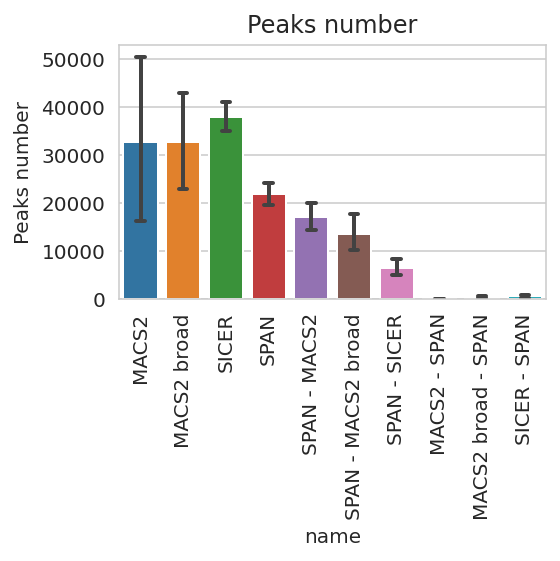

In [94]:
plt.figure(figsize=(4, 4))
ax = plt.axes()
ax.title.set_text('Peaks number')
g_results = sns.barplot(data=full_bench_df[full_bench_df['overlap'] == '1bp overlap'], x='name', y='peaks',
                        ax=ax,
                        capsize=.2, errwidth=2,
                        order=['MACS2', 'MACS2 broad', 'SICER', 'SPAN',
                               'SPAN - MACS2', 'SPAN - MACS2 broad', 'SPAN - SICER',
                               'MACS2 - SPAN', 'MACS2 broad - SPAN', 'SICER - SPAN',
                               ]
                        )
ax.xaxis.set_tick_params(rotation=90)
ax.set_ylabel('Peaks number')
plt.tight_layout()
plt.show()

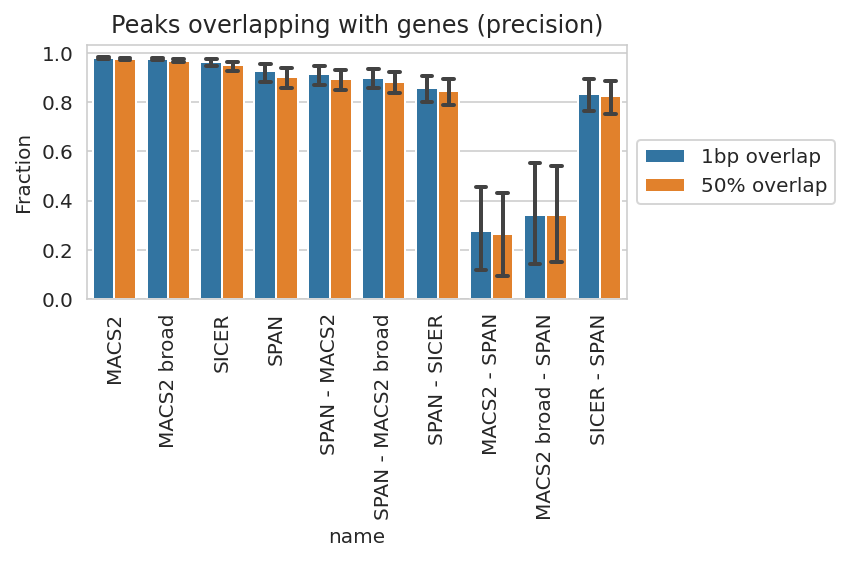

In [95]:
plt.figure(figsize=(6, 4))
ax = plt.axes()
ax.title.set_text('Peaks overlapping with genes (precision)')
g_results = sns.barplot(data=full_bench_df, x='name', y='precision',
                        hue='overlap',
                        capsize=.2, errwidth=2, ax=ax,
                        order=['MACS2', 'MACS2 broad', 'SICER', 'SPAN',
                               'SPAN - MACS2', 'SPAN - MACS2 broad', 'SPAN - SICER',
                               'MACS2 - SPAN', 'MACS2 broad - SPAN', 'SICER - SPAN',
                               ])
ax.xaxis.set_tick_params(rotation=90)
ax.set_ylabel('Fraction')
# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

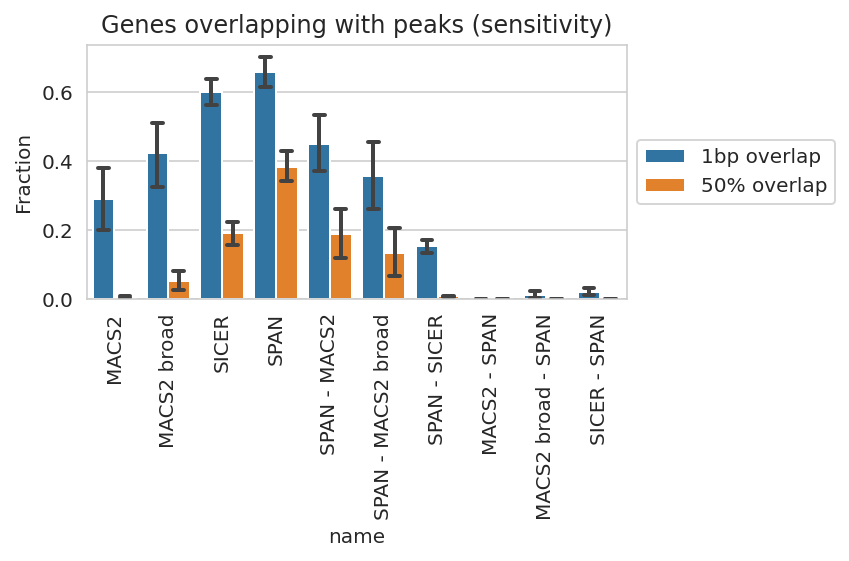

In [96]:
plt.figure(figsize=(6, 4))
ax = plt.axes()
ax.title.set_text('Genes overlapping with peaks (sensitivity)')
g_results = sns.barplot(data=full_bench_df, x='name', y='sensitivity',
                        hue='overlap',
                        capsize=.2, errwidth=2, ax=ax,
                        order=['MACS2', 'MACS2 broad', 'SICER', 'SPAN',
                               'SPAN - MACS2', 'SPAN - MACS2 broad', 'SPAN - SICER',
                               'MACS2 - SPAN', 'MACS2 broad - SPAN', 'SICER - SPAN',
                               ])
ax.xaxis.set_tick_params(rotation=90)
ax.set_ylabel('Fraction')
# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

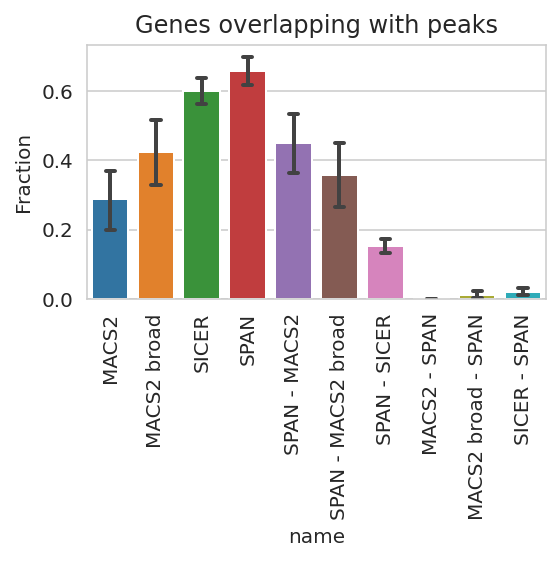

In [97]:
plt.figure(figsize=(4, 4))
ax = plt.axes()
ax.title.set_text('Genes overlapping with peaks')
g_results = sns.barplot(data=full_bench_df[full_bench_df['overlap'] == '1bp overlap'], x='name', y='sensitivity',
                        capsize=.2, errwidth=2, ax=ax,
                        order=['MACS2', 'MACS2 broad', 'SICER', 'SPAN',
                               'SPAN - MACS2', 'SPAN - MACS2 broad', 'SPAN - SICER',
                               'MACS2 - SPAN', 'MACS2 broad - SPAN', 'SICER - SPAN',
                               ])
ax.xaxis.set_tick_params(rotation=90)
ax.set_ylabel('Fraction')
plt.tight_layout()
plt.show()

# Hg38 Compare peaks to genes ratios

In [98]:
import tempfile
from itertools import product

tf = tempfile.mktemp()

ratio_df = pd.DataFrame(columns=['cell', 'replicate', 'tool', 'genes', 'peaks'], dtype=object)

for c, r in tqdm(product(GSE26320_CELLS, GSE26320_REPS)):
    print(c, r)
    if (c, r) not in EXPRESSION_BED:
        continue
    expr_file = EXPRESSION_BED[c, r]
    genes = lines(expr_file)
    for tool in set(df_fdr_peaks['tool']):
        t = df_fdr_peaks[(df_fdr_peaks['tool'] == tool) &
                         (df_fdr_peaks['modification'] == 'H3K36me3') &
                         (df_fdr_peaks['cell'] == c)]
        if len(t) == 0:
            continue
        peaks_file = t['file'].values[0]

        !bedtools intersect -a {expr_file} -b {peaks_file} -wa > {tf}
        tf_expression = pd.read_csv(
            tf, sep='\t',
            names=['chromosome', 'start', 'end', 'gene_id', 'strand', 'tpm', 'logTPM']
        )
        # display(tf_expression.sample(3))
        genes = len(tf_expression["gene_id"].unique())
        peaks = len(tf_expression)
        ratio_df.loc[len(ratio_df)] = (c, r, tool, genes, peaks)

ratio_df

0it [00:00, ?it/s]

GM12878 rep1
GM12878 rep2
HMEC rep1
HMEC rep2
HSMM rep1
HSMM rep2
K562 rep1
K562 rep2
NHEK rep1
NHEK rep2
NHLF rep1
NHLF rep2
H1 rep1
H1 rep2
Huvec rep1
Huvec rep2
HepG2 rep1
HepG2 rep2


cell replicate         tool  genes  peaks
0   GM12878      rep1        MACS2   5400  21240
1   GM12878      rep1  MACS2 broad   5238  14947
2   GM12878      rep1         SPAN  12557  24451
3   GM12878      rep1        SICER  11661  37324
4   GM12878      rep2        MACS2   5362  21086
..      ...       ...          ...    ...    ...
67    HepG2      rep1        SICER  11710  46068
68    HepG2      rep2        MACS2   1477   3856
69    HepG2      rep2  MACS2 broad  10006  50012
70    HepG2      rep2         SPAN  11958  26982
71    HepG2      rep2        SICER  11316  45624

[72 rows x 5 columns]

In [99]:
ratio_df['peaks_to_genes'] = ratio_df['peaks'] / ratio_df['genes']
ratio_df.sort_values(by=['tool'], inplace=True)

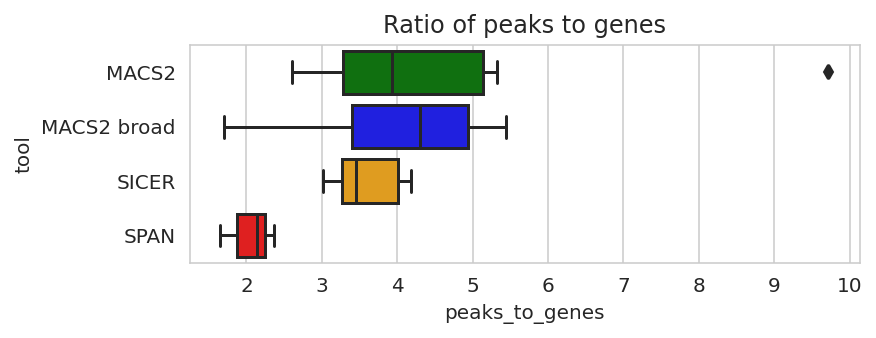

In [100]:
plt.figure(figsize=(6, 2))
ax = plt.axes()
g_results = sns.boxplot(data=ratio_df, x='peaks_to_genes', y='tool', ax=ax,
                        palette=TOOLS_PALETTE)
ax.title.set_text('Ratio of peaks to genes')
plt.show()

# Hg38 Reproducing benchmark with quanitified RNA-seq

Benchmark according to the paper https://doi.org/10.1093/bib/bbw035
Features that define the best ChIP-seq peak calling algorithms

We considered a peak as positive if it overlaps an active gene (defined varying RPKM from 0 to 2)
and compared methods based on sensitivity, precision and F-score.

In [101]:
import tempfile
from itertools import product

tf = tempfile.mktemp()
expr_file = tempfile.mktemp()

benchmark_df = pd.DataFrame(
    columns=['cell', 'replicate', 'tpm', 'genes', 'peaks_file', 'peaks', 'pg', 'gp', 'overlap', 'tool'],
    dtype=object
)

for c, r in tqdm(product(GSE26320_CELLS, GSE26320_REPS)):
    print(c, r)
    if (c, r) not in EXPRESSION_TSV:
        continue

    t = pd.read_csv(GSE26320_RNASEQ_PATH + '/' + EXPRESSION_TSV[c, r], sep='\t')
    # Fix . in gene_id
    t['gene_id'] = [re.sub('\..*', '', id) for id in t['gene_id']]
    t['LTPM'] = np.log1p(t['TPM'])
    full_df = pd.merge(left=t, right=gtf_genes_df, left_on='gene_id', right_on='gene_id')
    full_df = full_df[['chromosome', 'start', 'end', 'gene_id', 'strand', 'TPM', 'LTPM']]
    full_df.sort_values(by=['chromosome', 'start'], inplace=True)

    for tpm in np.linspace(0, 1, 5):
        print('Processing TMP', tpm)
        full_df[full_df['LTPM'] > tpm].to_csv(expr_file, sep='\t', index=False, header=None)
        genes = lines(expr_file)
        for tool in df_fdr_peaks['tool'].unique():
            t = df_fdr_peaks[(df_fdr_peaks['tool'] == tool) & (df_fdr_peaks['modification'] == 'H3K36me3') &
                             (df_fdr_peaks['cell'] == c) & (df_fdr_peaks['replicate'] == r)]
            if len(t) == 0:
                continue
            peaks_file = t['file'].values[0]
            peaks = lines(peaks_file)
            for overlap, overlap_param in [
                ('1bp overlap', ''),
                ('50% overlap', ' -f 0.5 ')
            ]:
                !bedtools intersect -a {peaks_file} -b {expr_file} -wa -u {overlap_param} > {tf}
                peaks_overlap = lines(tf)
                !bedtools intersect -b {peaks_file} -a {expr_file} -wa -u {overlap_param} > {tf}
                genes_overlap = lines(tf)
                benchmark_df.loc[len(benchmark_df)] = \
                    (c, r, tpm, genes, peaks_file, peaks, peaks_overlap, genes_overlap, overlap, tool)

benchmark_df

0it [00:00, ?it/s]

GM12878 rep1
Processing TMP 0.0
Processing TMP 0.25
Processing TMP 0.5
Processing TMP 0.75
Processing TMP 1.0
GM12878 rep2
Processing TMP 0.0
Processing TMP 0.25
Processing TMP 0.5
Processing TMP 0.75
Processing TMP 1.0
HMEC rep1
Processing TMP 0.0
Processing TMP 0.25
Processing TMP 0.5
Processing TMP 0.75
Processing TMP 1.0
HMEC rep2
Processing TMP 0.0
Processing TMP 0.25
Processing TMP 0.5
Processing TMP 0.75
Processing TMP 1.0
HSMM rep1
Processing TMP 0.0
Processing TMP 0.25
Processing TMP 0.5
Processing TMP 0.75
Processing TMP 1.0
HSMM rep2
Processing TMP 0.0
Processing TMP 0.25
Processing TMP 0.5
Processing TMP 0.75
Processing TMP 1.0
K562 rep1
Processing TMP 0.0
Processing TMP 0.25
Processing TMP 0.5
Processing TMP 0.75
Processing TMP 1.0
K562 rep2
Processing TMP 0.0
Processing TMP 0.25
Processing TMP 0.5
Processing TMP 0.75
Processing TMP 1.0
NHEK rep1
Processing TMP 0.0
Processing TMP 0.25
Processing TMP 0.5
Processing TMP 0.75
Processing TMP 1.0
NHEK rep2
Processing TMP 0.0
Pr

cell replicate  tpm  genes  \
0    GM12878      rep1  0.0  21863   
1    GM12878      rep1  0.0  21863   
2    GM12878      rep1  0.0  21863   
3    GM12878      rep1  0.0  21863   
4    GM12878      rep1  0.0  21863   
..       ...       ...  ...    ...   
675    HepG2      rep2  1.0  11604   
676    HepG2      rep2  1.0  11604   
677    HepG2      rep2  1.0  11604   
678    HepG2      rep2  1.0  11604   
679    HepG2      rep2  1.0  11604   

                                            peaks_file  peaks     pg     gp  \
0    /home/jetbrains/data/2023_GSE26320/macs2/GSM64...   1741   1715   1259   
1    /home/jetbrains/data/2023_GSE26320/macs2/GSM64...   1741   1710      4   
2    /home/jetbrains/data/2023_GSE26320/macs2/GSM64...  13794  13598   5371   
3    /home/jetbrains/data/2023_GSE26320/macs2/GSM64...  13794  13501    150   
4    /home/jetbrains/data/2023_GSE26320/sicer/GSM64...  29804  29344  11913   
..                                                 ...    ...    ...    ...   
675  /home/jetbrains/data/2023_GSE26320/macs2/GSM64...   4769   4698     32   
676  /home/jetbrains/data/2023_GSE26320/sicer/GSM64...  41709  40139   9581   
677  /home/jetbrains/data/2023_GSE26320/sicer/GSM64...  41709  39809   2746   
678  /home/jetbrains/data/2023_GSE26320/span/GSM646...  23393  21995   9915   
679  /home/jetbrains/data/2023_GSE26320/span/GSM646...  23393  21738   5305   

         overlap         tool  
0    1bp overlap        MACS2  
1    50% overlap        MACS2  
2    1bp overlap  MACS2 broad  
3    50% overlap  MACS2 broad  
4    1bp overlap        SICER  
..           ...          ...  
675  50% overlap  MACS2 broad  
676  1bp overlap        SICER  
677  50% overlap        SICER  
678  1bp overlap         SPAN  
679  50% overlap         SPAN  

[680 rows x 10 columns]

In [102]:
benchmark_df['p'] = (benchmark_df['pg'] + benchmark_df['gp']) / 2
benchmark_df['precision'] = [d(x, y) for x, y in zip(benchmark_df['pg'], benchmark_df['peaks'])]
benchmark_df['sensitivity'] = [d(x, y) for x, y in zip(benchmark_df['gp'], benchmark_df['genes'])]
benchmark_df['f1'] = [2 / (d(1, s + 1e-10) + d(1, p + 1e-10)) for s, p in zip(benchmark_df['sensitivity'], benchmark_df['precision'])]
benchmark_df

cell replicate  tpm  genes  \
0    GM12878      rep1  0.0  21863   
1    GM12878      rep1  0.0  21863   
2    GM12878      rep1  0.0  21863   
3    GM12878      rep1  0.0  21863   
4    GM12878      rep1  0.0  21863   
..       ...       ...  ...    ...   
675    HepG2      rep2  1.0  11604   
676    HepG2      rep2  1.0  11604   
677    HepG2      rep2  1.0  11604   
678    HepG2      rep2  1.0  11604   
679    HepG2      rep2  1.0  11604   

                                            peaks_file  peaks     pg     gp  \
0    /home/jetbrains/data/2023_GSE26320/macs2/GSM64...   1741   1715   1259   
1    /home/jetbrains/data/2023_GSE26320/macs2/GSM64...   1741   1710      4   
2    /home/jetbrains/data/2023_GSE26320/macs2/GSM64...  13794  13598   5371   
3    /home/jetbrains/data/2023_GSE26320/macs2/GSM64...  13794  13501    150   
4    /home/jetbrains/data/2023_GSE26320/sicer/GSM64...  29804  29344  11913   
..                                                 ...    ...    ...    ...   
675  /home/jetbrains/data/2023_GSE26320/macs2/GSM64...   4769   4698     32   
676  /home/jetbrains/data/2023_GSE26320/sicer/GSM64...  41709  40139   9581   
677  /home/jetbrains/data/2023_GSE26320/sicer/GSM64...  41709  39809   2746   
678  /home/jetbrains/data/2023_GSE26320/span/GSM646...  23393  21995   9915   
679  /home/jetbrains/data/2023_GSE26320/span/GSM646...  23393  21738   5305   

         overlap         tool        p  precision  sensitivity        f1  
0    1bp overlap        MACS2   1487.0   0.985066     0.057586  0.108811  
1    50% overlap        MACS2    857.0   0.982194     0.000183  0.000366  
2    1bp overlap  MACS2 broad   9484.5   0.985791     0.245666  0.393315  
3    50% overlap  MACS2 broad   6825.5   0.978759     0.006861  0.013626  
4    1bp overlap        SICER  20628.5   0.984566     0.544893  0.701533  
..           ...          ...      ...        ...          ...       ...  
675  50% overlap  MACS2 broad   2365.0   0.985112     0.002758  0.005500  
676  1bp overlap        SICER  24860.0   0.962358     0.825664  0.888786  
677  50% overlap        SICER  21277.5   0.954446     0.236643  0.379254  
678  1bp overlap         SPAN  15955.0   0.940239     0.854447  0.895292  
679  50% overlap         SPAN  13521.5   0.929252     0.457170  0.612838  

[680 rows x 14 columns]

In [103]:
import plotly.graph_objects as go

TOOLS_PALETTE = {'MACS2': "green", 'MACS2 broad': 'blue', 'SICER': "orange", 'SPAN': 'red'}


def plot_tpm(benchmark_df):
    tools_legend_shown = set()
    fig = go.Figure()
    for overlap in benchmark_df['overlap'].unique():
        marker = 'square' if overlap == '1bp overlap' else  'circle' if overlap == '50% overlap' else 'diamond'
        for c, r, t in product(GSE26320_CELLS, GSE26320_REPS, df_fdr_peaks['tool'].unique()):
            dft = benchmark_df[(benchmark_df['cell'] == c) & (benchmark_df['replicate'] == r) &
                               (benchmark_df['overlap'] == overlap) & (benchmark_df['tool'] == t)]
            if len(dft) == 0:
                continue
            fig.add_trace(go.Scatter(
                x=dft["precision"], y=dft["sensitivity"], mode='lines+markers', name=t,
                hovertext=dft['tpm'].astype(str) + ' ' + t, marker_symbol=[marker] * len(dft),
                showlegend=t not in tools_legend_shown,
                marker_color=TOOLS_PALETTE[t],
                opacity=0.3,
            ))
            tools_legend_shown.add(t)

    for overlap in set(benchmark_df['overlap']):
        marker = 'square' if overlap == '1bp overlap' else  'circle' if overlap == '50% overlap' else 'diamond'
        for c, r, t in product(GSE26320_CELLS, GSE26320_REPS, df_fdr_peaks['tool'].unique()):
            dft = benchmark_df[(benchmark_df['cell'] == c) & (benchmark_df['replicate'] == r) &
                               (benchmark_df['overlap'] == overlap) & (benchmark_df['tool'] == t) &
                               (benchmark_df['tpm'] != 1.0)]
            if len(dft) == 0:
                continue
            fig.add_trace(
                go.Scatter(
                    mode='markers',
                    x=dft["precision"], y=dft["sensitivity"],
                    name=t,
                    marker=dict(color='white', size=3, line=dict(width=1), symbol=marker),
                    showlegend=False,
                    hovertext=dft['tpm'].astype(str) + ' ' + t,
                    opacity=0.3,
                )
            )

    for overlap in set(benchmark_df['overlap']):
        marker = 'square' if overlap == '1bp overlap' else  'circle' if overlap == '50% overlap' else 'diamond'
        for c, r, t in product(GSE26320_CELLS, GSE26320_REPS, df_fdr_peaks['tool'].unique()):
            dft = benchmark_df[(benchmark_df['cell'] == c) & (benchmark_df['replicate'] == r) &
                               (benchmark_df['overlap'] == overlap) & (benchmark_df['tool'] == t) &
                               (benchmark_df['tpm'] == 1.0)]
            if len(dft) == 0:
                continue
            fig.add_trace(
                go.Scatter(
                    mode='markers',
                    x=dft["precision"], y=dft["sensitivity"],
                    name=t,
                    marker=dict(color='white', size=5, line=dict(width=1), symbol=marker),
                    showlegend=False,
                    hovertext=dft['tpm'].astype(str) + ' ' + t
                )
            )

    # fig.update_xaxes(range=[-0.1, 1.1], title='Peaks overlapping active genes (precision)')
    # fig.update_yaxes(range=[-0.1, 1.1], title='Active genes overlapping peaks (sensitivity)')
    fig.update_xaxes(title='Peaks overlapping active genes (precision)')
    fig.update_yaxes(title='Active genes overlapping peaks (sensitivity)')

    fig.layout.template = 'plotly_white'
    fig.update_layout(
        autosize=False,
        width=1200,
        height=800,)
    fig.show()


In [104]:
plot_tpm(benchmark_df[benchmark_df['overlap'] == '1bp overlap'])

In [105]:
plot_tpm(benchmark_df[benchmark_df['overlap'] == '50% overlap'])